#CISC-873-DM-F22-A1: Wish.com Product Rating Prediction

The goal is to predict the product ratings given the other features known for a product on Wish.com. Ratings are in categories from 1 to 5

#Download data from kaggle

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
 !pip install kaggle --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!mkdir ~/.kaggle


In [4]:
! cp kaggle.json ~/.kaggle

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle --version

Kaggle API 1.5.12


In [7]:
!kaggle competitions download -c cisc-873-dm-f22-a1

  0% 0.00/183k [00:00<?, ?B/s]
100% 183k/183k [00:00<00:00, 56.9MB/s]


In [8]:
!unzip /content/cisc-873-dm-f22-a1.zip

Archive:  /content/cisc-873-dm-f22-a1.zip
  inflating: sample_submission_new.csv  
  inflating: test_new.csv            
  inflating: train_new.csv           


#Data Loading 


In [492]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [493]:
#read train and test files
df_train = pd.read_csv('train_new.csv')
df_test = pd.read_csv('test_new.csv')

In [494]:
df_test_id=pd.read_csv('test_new.csv')


#Training data

##Exploration and preprocessing training data

In [495]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   currency_buyer                1094 non-null   object 
 3   units_sold                    1094 non-null   int64  
 4   uses_ad_boosts                1094 non-null   int64  
 5   rating                        1094 non-null   float64
 6   rating_count                  1094 non-null   int64  
 7   badges_count                  1094 non-null   int64  
 8   badge_local_product           1094 non-null   int64  
 9   badge_product_quality         1094 non-null   int64  
 10  badge_fast_shipping           1094 non-null   int64  
 11  tags                          1094 non-null   object 
 12  product_color                 1065 non-null   object 
 13  pro

In [496]:
df_train.shape

(1094, 34)

In [497]:
df_train.head()

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,...,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,...,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,...,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,...,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,...,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226


In [498]:
# checking for missing values for every feature
df_train.isnull().sum()

price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    29
product_variation_size_id        12
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              745
urgency_text                    745
origin_country                   12
merchant_title                    0
merchant_name                     4
merchant_info_subtitle            0
merchant_rating_count             0
merchant_rating             

In [499]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [500]:
missing_values_table(df_train)

Your selected dataframe has 34 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
merchant_profile_picture,924,84.5
has_urgency_banner,745,68.1
urgency_text,745,68.1
product_color,29,2.7
product_variation_size_id,12,1.1
origin_country,12,1.1
merchant_name,4,0.4


these features('merchant_profile_picture', 'has_urgency_banner','urgency_text')have so many null values so we will drop them

In [501]:
df_train.columns

Index(['price', 'retail_price', 'currency_buyer', 'units_sold',
       'uses_ad_boosts', 'rating', 'rating_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'theme', 'crawl_month', 'id'],
      dtype='object')

In [502]:
df_train=df_train.drop(['merchant_profile_picture', 'has_urgency_banner','urgency_text'], axis=1)


In [503]:
df_train.columns

Index(['price', 'retail_price', 'currency_buyer', 'units_sold',
       'uses_ad_boosts', 'rating', 'rating_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture', 'theme', 'crawl_month',
       'id'],
      dtype='object')

In [504]:
df_train.shape

(1094, 31)

'id'feature is not relevat and affect of the prediction,so drop it
 

In [505]:
df_train=df_train.drop(['id'], axis=1)

In [506]:
df_train=df_train.drop(['merchant_id'], axis=1)

In [507]:
df_train.shape

(1094, 29)

In [508]:
df_train.columns

Index(['price', 'retail_price', 'currency_buyer', 'units_sold',
       'uses_ad_boosts', 'rating', 'rating_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', 'theme', 'crawl_month'],
      dtype='object')

###price

In [509]:
df_train["price"].value_counts()

8.00     196
11.00    135
7.00      89
6.00      88
9.00      88
        ... 
25.00      1
5.70       1
3.90       1
4.69       1
4.73       1
Name: price, Length: 117, dtype: int64

In [510]:
df_train["price"].isnull().sum()

0

###retail_price

In [511]:
df_train["retail_price"].value_counts()

7      127
6      103
10      86
11      73
5       71
      ... 
87       1
139      1
37       1
53       1
57       1
Name: retail_price, Length: 95, dtype: int64

In [512]:
df_train["retail_price"].isnull().sum()

0

###currency_buyer

In [513]:
df_train["currency_buyer"].value_counts()

EUR    1094
Name: currency_buyer, dtype: int64

In [514]:
df_train["currency_buyer"].isnull().sum()

0

"currency_buyer" feature contains only one unique value, so drop it


In [515]:
df_train=df_train.drop(['currency_buyer'], axis=1)


###units_sold

In [516]:
df_train["units_sold"].value_counts()

100       353
1000      280
5000      139
10000     125
20000      79
50         54
10         37
50000      12
100000      5
8           4
1           3
2           2
7           1
Name: units_sold, dtype: int64

In [517]:
df_train["units_sold"].isnull().sum()

0

In [518]:
df_train['units_sold'] = df_train['units_sold'].replace(1, 10)
df_train['units_sold'] = df_train['units_sold'].replace(8, 10)
df_train['units_sold'] = df_train['units_sold'].replace(7, 10)
df_train['units_sold'] = df_train['units_sold'].replace(3, 10)
df_train['units_sold'] = df_train['units_sold'].replace(2, 10)
df_train['units_sold'] = df_train['units_sold'].replace(6, 10)

In [519]:
df_train['units_sold'].value_counts()

100       353
1000      280
5000      139
10000     125
20000      79
50         54
10         47
50000      12
100000      5
Name: units_sold, dtype: int64

###uses_ad_boosts

In [520]:
df_train["uses_ad_boosts"].value_counts()

0    621
1    473
Name: uses_ad_boosts, dtype: int64

In [521]:
df_train["uses_ad_boosts"].isnull().sum()

0

###rating

In [522]:
df_train["rating"].value_counts()

4.0    774
5.0    170
3.0    135
2.0     12
1.0      2
6.0      1
Name: rating, dtype: int64

In [523]:
df_train["rating"].isnull().sum()

0

the product rating from [1:5]only we have not product rating is 6 so, drop this value 

In [524]:
# drop rows when product rating is 6
df_train = df_train[df_train['rating'] != 6] 

In [525]:
df_train["rating"].value_counts()

4.0    774
5.0    170
3.0    135
2.0     12
1.0      2
Name: rating, dtype: int64

###rating_count

In [526]:
df_train["rating_count"].value_counts()

0       30
2       27
4       22
6       16
10      15
        ..
1183     1
370      1
569      1
4421     1
135      1
Name: rating_count, Length: 584, dtype: int64

In [527]:
df_train["rating_count"].isnull().sum()

0

the previous cell shows that there are 30 entries with zero rating 


In [528]:
#df_train[df_train['rating_count'] == 0][['rating','rating_count']]

these entries have raiting of 5 so they should be dropped

In [529]:
# drop rows when product rating_count is 0
#df_train = df_train[df_train['rating_count'] != 0]

###badges_count

In [530]:
df_train["badges_count"].value_counts()

0    979
1    105
2      8
3      1
Name: badges_count, dtype: int64

In [531]:
df_train["badges_count"].isnull().sum()

0

###badge_local_product

In [532]:
df_train["badge_local_product"].value_counts()

0    1072
1      21
Name: badge_local_product, dtype: int64

In [533]:
df_train["badge_local_product"].isnull().sum()

0

###badge_product_quality

In [534]:
df_train["badge_product_quality"].value_counts()

0    1002
1      91
Name: badge_product_quality, dtype: int64

In [535]:
df_train["badge_product_quality"].isnull().sum()

0

###badge_fast_shipping

In [536]:
df_train["badge_fast_shipping"].value_counts()

0    1081
1      12
Name: badge_fast_shipping, dtype: int64

In [537]:
df_train["badge_fast_shipping"].isnull().sum()

0

###tags

In [538]:
df_train["tags"].value_counts()

Summer,Fashion,Necks,Skirts,Dress,Loose,Women's Fashion,Round neck,beach dress,sleeveless,Beach,Casual,Women                                                                                                                         13
Summer,Sling,Dresses,Dress,V-neck,Casual,Pocket,Women's Fashion,Sleeveless dress,women dress,Floral,sleeveless,Women,loose dress,Pleated,casual dress                                                                                 7
slimming,wasitcincher,Fashion,waistgirdle,slimmingcorset,Corset,Summer,Waist,waist trainer,Fashion Accessory,Vest,shaperwear,belt                                                                                                     6
Summer,Women Rompers,Plus Size,women long pants,linenjumpsuit,pants,Overalls,Loose,plussizejumpsuit,Women's Fashion,strappant,Long pants,Jumpsuits & Rompers,rompers womens jumpsuit,Vintage,Women,women Jumpsuit,Casual,jumpsuit     6
Summer,Leggings,Fashion,high waist,pants,slim,Women's Fashion,trousers,G

In [539]:
df_train["tags"].isnull().sum()

0

we can simplfy tags

In [540]:
def tags_simplifier(tags):
    if 'dress' in tags.lower() or 'halter' in tags.lower():
        return 'Dress'
    elif 'swimwear' in tags.lower() or 'swimming' in tags.lower() or 'swimsuit' in tags.lower() or 'bikini' in tags.lower() or 'tankini' in tags.lower() or 'swim' in tags.lower() or 'beach' in tags.lower():
        return 'Swimwear'
    elif 'pant' in tags.lower() or 'legging' in tags.lower() or 'jean' in tags.lower() or 'trouser' in tags.lower():
        return 'Pants'
    elif 'short' in tags.lower():
        return 'Shorts'
    elif 'skirt' in tags.lower():
        return 'Skirt'
    elif 'top' in tags.lower() or 'blouse' in tags.lower() or 'shirt' in tags.lower() or 'sweatshirt' in tags.lower() or 'sweater' in tags.lower() or 'vest' in tags.lower() or 'tank top' in tags.lower():
        return 'Top'
    elif 'sport' in tags.lower() or 'yoga' in tags.lower() or 'fitness' in tags.lower() or 'running' in tags.lower() or 'athletic' in tags.lower(): 
        return 'Sportswear'
    elif 'romper' in tags.lower() or 'jumpsuit' in tags.lower() or 'overalls' in tags.lower() or 'bodysuit' in tags.lower():
        return 'Onepiece'
    elif 'shoe' in tags.lower() or 'slipper' in tags.lower() or 'sneaker' in tags.lower():
        return 'Footwear'
    elif 'pajama' in tags.lower() or 'pyjama' in tags.lower() or 'sleep' in tags.lower() or 'sleepwear' in tags.lower():
        return 'Sleepwear'
    else:
        return 'Accessories'

In [541]:
df_train['tags_simple'] = df_train['tags'].apply(lambda x: tags_simplifier(x))


In [542]:
df_train['tags_simple'].value_counts()

Dress          435
Top            189
Pants          162
Swimwear       134
Shorts         133
Accessories     14
Onepiece        10
Sportswear       6
Footwear         4
Sleepwear        4
Skirt            2
Name: tags_simple, dtype: int64

In [543]:
def fashion_category(tags):
    if "women's fashion" in tags.lower() or 'women fashion' in tags.lower() or 'women' in tags.lower():
            return "Women's Fashion"
    else:
        return "Men's Fashion"

In [544]:
df_train['product_category'] = df_train['tags'].apply(lambda x: fashion_category(x))


In [545]:
df_train['product_category'].value_counts()

Women's Fashion    980
Men's Fashion      113
Name: product_category, dtype: int64

In [546]:
df_train=df_train.drop(['tags'], axis=1)


###product_color

In [547]:
df_train["product_color"].value_counts()

black             219
white             173
blue               77
yellow             69
pink               68
                 ... 
rainbow             1
claret              1
whitestripe         1
light green         1
brown & yellow      1
Name: product_color, Length: 86, dtype: int64

In [548]:
df_train["product_color"].isnull().sum()

29

In [549]:
df_train['product_color'] = df_train.product_color.replace(dict.fromkeys(["orange-red", "blackwhite", "multicolor",
                                          "camouflage", "rainbow","pink & black","black & yellow","white & black",
                                          "black & white","black & blue","black & green","pink & grey","winered & yellow","brown & yellow",
                                          "navyblue & white","pink & white","white & green","gray & white","black & stripe","orange & camouflage",
                                          "red & blue","white & red","pink & blue","red & blue","blue & pink"
                                          
                                          ], 'multicolor'))

In [550]:
df_train['product_color'] = df_train.product_color.replace(dict.fromkeys(["lightgrey", "lightgray", "gray", "grey"], 'gray'))

In [551]:
df_train['product_color'] = df_train.product_color.replace(dict.fromkeys(["applegreen","light green","armygreen","darkgreen","green","mintgreen",
                                         "army green", "lightgreen", "Army green","fluorescentgreen", "flourescentgreen"], 'green'))

In [552]:
df_train['product_color'] = df_train.product_color.replace(dict.fromkeys(["Red","wine red","coralred","winered","rosered","watermelonred", 
                                          "lightred", "RED","rose", "Rose red","burgundy"], 'red'))

In [553]:
df_train['product_color'] = df_train.product_color.replace(dict.fromkeys(["Blue","darkblue","denimblue","lightblue",
                                          "navyblue", "navy blue","prussianblue", "skyblue", "lakeblue", "navy"], 'blue'))

In [554]:
df_train['product_color'] = df_train.product_color.replace(dict.fromkeys(["White","whitefloral","whitestripe", "offwhite", "ivory"], 'white'))

In [555]:
df_train['product_color'] = df_train.product_color.replace(dict.fromkeys(["Black","offblack", "coolblack"], 'black'))

In [556]:
df_train['product_color'] = df_train.product_color.replace(dict.fromkeys(["Pink","dustypink","lightpink", "rosegold"], 'pink'))

In [557]:
df_train['product_color'] = df_train.product_color.replace(dict.fromkeys(["Brown","lightkhaki", "coffee", "khaki"], 'brown'))

In [558]:
df_train['product_color'] = df_train.product_color.replace(dict.fromkeys(["Yellow","lightyellow", "gold"], 'yellow'))

In [559]:
df_train['product_color'] = df_train.product_color.replace(dict.fromkeys(["Purple","lightpurple", "violet"], 'purple'))

In [560]:
df_train['product_color'] = df_train.product_color.replace(dict.fromkeys(["Orange","apricot"], 'orange'))

In [561]:
df_train['product_color'] = df_train.product_color.replace(dict.fromkeys(["army", "leopard", "leopardprint","greysnakeskinprint", 
                                         "silver", "camel", "tan", "star", "floral", "wine", "claret", "jasper", "nude"], 'other'))

In [562]:
pr_colr = df_train['product_color'].value_counts()
pr_colr[pr_colr > 2]

black         224
white         181
blue          122
red            96
green          95
pink           76
yellow         71
gray           56
multicolor     50
purple         38
brown          21
orange         17
other          12
beige           5
Name: product_color, dtype: int64

In [563]:
df_train['product_color'].isnull().sum()

29

In [564]:
df_train['product_color'] = df_train['product_color'].replace(np.nan, 'other')


In [565]:
df_train['product_color'].isnull().sum()

0

###product_variation_size_id

In [566]:
df_train['product_variation_size_id'].value_counts()

S           444
XS          248
M           135
XXS          76
L            29
           ... 
pants-S       1
XXXXL         1
SIZE-XXS      1
1pc           1
H01           1
Name: product_variation_size_id, Length: 83, dtype: int64

In [567]:
df_train['product_variation_size_id'].unique()

array(['M', 'L', 'XS', 'S', 'XL', '26(Waist 72cm 28inch)', 'S.',
       'S(bust 88cm)', 'XXS', 's', '29', nan, 'choose a size', 'XXXS',
       'Base Coat', 'Size M', 'XXL', 'M.', 'XS.',
       '100 x 100cm(39.3 x 39.3inch)', '2pcs', '4XL', '1', '25-S',
       'Size-XXS', '5PAIRS', '35', 'Pack of 1', 'Size S', 'Size-S', '6XL',
       '25', 'S/M(child)', '60', 'Size-XS', 'S (waist58-62cm)',
       'SIZE XXS', '10 ml', 'X   L', 'Women Size 36', '04-3XL',
       'Size -XXS', '1 pc.', 'Floating Chair for Kid', 'S Pink', '34',
       'US-S', 'Size XXS', 'pants-S', 'XXXXL', 'SIZE-XXS', 'SIZE XS',
       '1pc', 'Size S.', '100 cm', 'S..', 'Round', '4-5 Years', '5', '33',
       '30 cm', '2', 'XXXXXL', '20PCS-10PAIRS', '2XL', 'Size-5XL',
       'Size4XL', 'One Size', 'size S', 'Size/S', 'B', 'SizeL', '20pcs',
       '1 PC - XL', 'Suit-S', 'Base & Top & Matte Top Coat',
       'Baby Float Boat', '1m by 3m', 'SIZE S', 'White', '40 cm', '5XL',
       '10pcs', 'H01'], dtype=object)

In [568]:
df_train['product_variation_size_id'] = df_train['product_variation_size_id'].replace(dict.fromkeys(['S.','Size S', 'Size-S', 
                             'size S', 'Size S.', 's'], 'S'))

In [569]:
df_train['product_variation_size_id'] = df_train['product_variation_size_id'].replace(dict.fromkeys(['XS','Size-XS', 'SIZE XS'], 'XS'))

In [570]:
df_train['product_variation_size_id'] = df_train['product_variation_size_id'].replace(dict.fromkeys(['M.','Size M'], 'M'))

In [571]:
df_train['product_variation_size_id'] = df_train['product_variation_size_id'].replace(dict.fromkeys(['Size -XXS','SIZE-XXS'], 'XXS'))

In [572]:
df_train['product_variation_size_id'] = df_train['product_variation_size_id'].replace(dict.fromkeys(['SizeL'], 'L'))

In [573]:
df_train['product_variation_size_id'] = df_train['product_variation_size_id'].replace(dict.fromkeys(['2XL'], 'XXL'))

In [574]:
df_train['product_variation_size_id'] = df_train['product_variation_size_id'].replace(dict.fromkeys(['3XL'], 'XXXL'))

In [575]:
df_train['product_variation_size_id'] = df_train['product_variation_size_id'].replace(dict.fromkeys(['4XL','Size4XL'], 'XXXXL'))

In [576]:
df_train['product_variation_size_id'] = df_train['product_variation_size_id'].replace(dict.fromkeys(['5XL'], 'XXXXXL'))

In [577]:
pr_var = df_train['product_variation_size_id'].value_counts()
pr_var[pr_var > 1]

S         469
XS        254
M         141
XXS        79
L          31
XXL        14
XL         12
XXXXL       7
XXXS        5
XS.         4
10 ml       3
S Pink      2
29          2
33          2
2pcs        2
XXXXXL      2
35          2
25          2
Name: product_variation_size_id, dtype: int64

In [578]:
def pr_var(name):
    if name == 'XXXS' \
    or name == 'XXS' \
    or name == 'XS' \
    or name == 'S' \
    or name == 'M' \
    or name == 'L' \
    or name == 'XL' \
    or name == 'XXL' \
    or name == 'XXXXL' \
    or name == 'XXXXXL':
        return name
    else:
        return "OTHER"

In [579]:
df_train['product_variation_size_id'] = df_train['product_variation_size_id'].replace(np.nan, 'OTHER')


In [580]:
df_train['product_variation_size_id'] = df_train['product_variation_size_id'].apply(pr_var)

In [581]:
pr_var = df_train['product_variation_size_id'].value_counts()
pr_var[pr_var > 1]

S         469
XS        254
M         141
OTHER      79
XXS        79
L          31
XXL        14
XL         12
XXXXL       7
XXXS        5
XXXXXL      2
Name: product_variation_size_id, dtype: int64

###product_variation_inventory

In [582]:
df_train["product_variation_inventory"].value_counts()

50    626
1     114
2      53
5      51
3      38
10     26
9      17
7      15
4      14
6      12
18      9
17      9
15      9
20      8
13      6
25      6
49      5
19      5
14      5
46      4
11      4
8       4
30      4
29      4
44      4
48      3
47      3
36      3
45      3
34      3
41      3
35      2
12      2
40      2
26      2
31      2
43      2
38      2
24      1
33      1
22      1
21      1
27      1
16      1
23      1
28      1
37      1
Name: product_variation_inventory, dtype: int64

In [583]:
df_train["product_variation_inventory"].isnull().sum()

0

###shipping_option_name

In [584]:
df_train["shipping_option_name"].value_counts()

Livraison standard         1047
Standard Shipping            16
Envio Padrão                  6
الشحن القياسي                 4
Expediere Standard            4
Envío normal                  3
Standardversand               3
Standardowa wysyłka           2
Standart Gönderi              2
Livraison Express             2
Стандартная доставка          2
Spedizione standard           1
ការដឹកជញ្ជូនតាមស្តង់ដារ       1
Name: shipping_option_name, dtype: int64

In [585]:
df_train["shipping_option_name"].isnull().sum()

0

"shipping_option_name" feature has only unique values but with different languagues, so drop it


In [586]:
df_train=df_train.drop(['shipping_option_name'], axis=1)


###shipping_option_price

In [587]:
df_train["shipping_option_price"].value_counts()

2    417
3    370
1    222
4     49
5     23
6      8
7      4
Name: shipping_option_price, dtype: int64

In [588]:
df_train["shipping_option_price"].isnull().sum()

0

###shipping_is_express

In [589]:
df_train["shipping_is_express"].value_counts()

0    1091
1       2
Name: shipping_is_express, dtype: int64

approximetly "shipping_is_express" feature has only unique values, so drop it

In [590]:
df_train=df_train.drop(['shipping_is_express'], axis=1)


###countries_shipped_to

In [591]:
df_train["countries_shipped_to"].value_counts()

41     121
43     112
40      82
38      51
36      48
      ... 
107      1
111      1
56       1
135      1
53       1
Name: countries_shipped_to, Length: 83, dtype: int64

In [592]:
df_train["countries_shipped_to"].unique()

array([ 30,  37,  41,  25,  15,  42, 111,  55,  40,  31,  50,  43,  39,
        27,  33,  24,  35,  36,  23,  38,  28,  11,  51,  10,  45,  26,
        34,  48,  32,  18,  44, 139,  62,  19,  22,  20, 109,  29,  57,
        46, 137,  47,  12,  54,  21,  17,  80,  78,  52, 135,  81,  56,
        58, 127,  49, 138, 107,  63,  69,   9,  60,   8,  61,  13, 132,
       118,  16,  91, 104,  68,  14,  72,  73,  66, 125,  94,  70, 140,
        74,  71,  90,  82,  53])

In [593]:
df_train["countries_shipped_to"].isnull().sum()

0

###inventory_total

In [594]:
df_train["inventory_total"].value_counts()

50    1089
1        1
9        1
37       1
36       1
Name: inventory_total, dtype: int64

approximetly "inventory_total" feature has only unique values (50), so drop it

In [595]:
df_train=df_train.drop(['inventory_total'], axis=1)


###origin_country

In [596]:
df_train["origin_country"].value_counts()

CN    1053
US      22
VE       3
SG       2
GB       1
Name: origin_country, dtype: int64

In [597]:
df_train['origin_country'].isnull().sum()

12

In [598]:
df_train['origin_country'] = df_train['origin_country'].replace('VE', 'Other')
df_train['origin_country'] = df_train['origin_country'].replace('SG', 'Other')
df_train['origin_country'] = df_train['origin_country'].replace('GB', 'Other')

In [599]:
df_train['origin_country'] = df_train['origin_country'].replace(np.nan, 'Other')


In [600]:
df_train['origin_country'].isnull().sum()

0

In [601]:
df_train["origin_country"].value_counts()

CN       1053
US         22
Other      18
Name: origin_country, dtype: int64

In [602]:
#df_train.drop('origin_country', inplace=True, axis=1)


###merchant_title

In [603]:
df_train["merchant_title"].value_counts()

Suyi Technology                             8
guangzhouweishiweifushiyouxiangongsi        7
shuilingjiao international trade company    6
fengjinying                                 6
Sangboo Store                               6
                                           ..
Wwenliping                                  1
yourvogue                                   1
caohongbo                                   1
bumanke003                                  1
OIUG 56465                                  1
Name: merchant_title, Length: 746, dtype: int64

In [604]:
df_train["merchant_title"].unique()

array(['keepahorse', 'shanghaimingqidianqikejiyouxiangongsi',
       'zhaodongmei', 'pookie0331', 'shitongyi12683626', 'pashesa',
       'bestwsih4u', 'xiakeliuxingfushi', 'Lees Closet', 'ailla clothing',
       'dududustore', 'redisland', 'Fancykini Wardrobe', 'TopLifeYouNeed',
       'Jun U Near Store', 'huanjun411', 'hzxuch', 'zufanqiudinli',
       'hellohorse', 'zengdaitao', 'KinzieWoolShop', 'vvfashion2016',
       'fashion belts', 'liminny', 'LLpp', 'gaoying666300', 'ChenMo Shop',
       'zhuangyuping1', 'liveupp', "Man's ocean", 'Prosehome',
       'Happygirl International Shopping Park', 'persisttree',
       'Gossip Girl 1', 'Raverks', 'Home Goods',
       'Chen Tidal current clothing', 'good999', "young's boutique",
       'shuilingjiao international trade company', 'cjinxiang', 'Memo2',
       'xvsivo7412', 'Masa co.ltd.', 'DERNMUUR', 'Nalin International',
       'longming', 'lionmouse', 'chailing', 'Yellow store',
       "Girls' showtime", 'Matt Olivo', 'yanzhang198411',


In [605]:
df_train["merchant_title"].isnull().sum()

0

"merchant_title" is not relevant to the output(prediction) , so drop it

In [606]:
df_train.drop('merchant_title', inplace=True, axis=1)

###merchant_name

In [607]:
df_train["merchant_name"].value_counts()

greatexpectationstechnology              8
广州唯适唯服饰有限公司                              7
sangboostore                             6
shuilingjiaointernationaltradecompany    6
fengjinying                              6
                                        ..
wwenliping                               1
yourvogue                                1
caohongbo                                1
bumanke003                               1
oiug56465                                1
Name: merchant_name, Length: 745, dtype: int64

In [608]:
df_train["merchant_name"].unique()

array(['keepahorse', '上海铭启电气科技有限公司', 'zhaodongmei', 'pookie0331',
       'shitongyi12683626', 'pashesa', 'shenzhenfinejofashioncoltd',
       'xiakeliuxingfushi', 'leescloset', 'litiannetworking',
       'dududustore', 'redisland', 'fancykiniwardrobe', 'toplifeyouneed',
       'jununearstore', 'huanjun411', 'hzxuch', 'zufanqiudinli',
       'hellohorse', 'zengdaitao', 'kinziewoolshop', 'vvfashion2016',
       'fashionbelts', 'liminny', 'llpp', 'gaoying666300', 'ahaashop',
       'zhuangyuping1', 'liveupp', 'mansocean', 'prosehome',
       'happygirlinternationalshoppingpark', 'persisttree',
       'aqlangweigarmentstradingcoltd', 'raverks', '公狼电子',
       'chentidalcurrentclothing', 'good999', 'youngsboutique',
       'shuilingjiaointernationaltradecompany', 'cjinxiang', 'memo2',
       'xvsivo7412', 'masacoltd', nan, 'nalininternational', 'longming',
       'lionmouse', 'chailing', 'yellowstore', 'girlsshowtime',
       'mattolivo', 'yanzhang198411', 'sellbestqualitygoods',
       'mo

In [609]:
df_train["merchant_name"].isnull().sum()

4

"merchant_name" is not relevant to the output(prediction) , so drop it

In [610]:
df_train.drop('merchant_name', inplace=True, axis=1)

###merchant_info_subtitle

In [611]:
df_train["merchant_info_subtitle"].value_counts()

86 % avis positifs (12,309 notes)    8
83 % avis positifs (32,168 notes)    7
85 % avis positifs (80,093 notes)    5
85 % avis positifs (5,264 notes)     5
84 % avis positifs (1,047 notes)     5
                                    ..
90 % avis positifs (2,359 notes)     1
90 % avis positifs (26,833 notes)    1
86 % avis positifs (4,335 notes)     1
79 % avis positifs (667 notes)       1
78 % avis positifs (6,632 notes)     1
Name: merchant_info_subtitle, Length: 807, dtype: int64

"merchant_info_subtitle" is not usfull to the output(prediction) , so drop it

In [612]:
df_train.drop('merchant_info_subtitle', inplace=True, axis=1)

###merchant_rating_count

In [613]:
df_train["merchant_rating_count"].value_counts()

12309    8
32168    7
88193    6
10600    6
10474    6
        ..
2946     1
2055     1
23609    1
36       1
6632     1
Name: merchant_rating_count, Length: 717, dtype: int64

In [614]:
df_train["merchant_rating_count"].unique()

array([  66644,   25752,    3897,    7497,     173,   16885,  253249,
           519,    5819,    9116,    3762,   59903,   44067,    4448,
          2116,    3276,    2127,       9,  126370,     331,   38100,
         90105,    1963,   12134,    1373,      28,    4830,     127,
          1012,    3743,    3271,   70773,   31916,   87178,    3237,
        190918,   19521,   17816,   54504,   88193,    6158,   18138,
           300,    4072,   17471,   13309,   27175,   26951,   13879,
         28295,  124563,    1722,      38,    4435,    5083,   15221,
         32168,    3028,    4646,  246312,    4705,   45372,    5595,
           342,    2366,   22711,    8740,   24564,   19184,  165915,
         12309,   36361,     528,    1500,      49,    3439,      29,
           783,      43,   31138,    2782,    7740,      21,   17655,
        130598,   12016,     144,   65189,   39395,   45151,   19221,
         12371,   16085,    9200,   17120,    1442,    4336,     151,
         18029,    8

###merchant_rating

In [615]:
df_train["merchant_rating"].value_counts()

4.045170    8
3.884544    7
4.080891    6
4.006692    6
3.867547    6
           ..
4.316022    1
3.837956    1
4.256597    1
4.444444    1
3.748794    1
Name: merchant_rating, Length: 741, dtype: int64

In [616]:
df_train["merchant_rating"].isnull().sum()

0

###merchant_has_profile_picture

In [617]:
df_train["merchant_has_profile_picture"].value_counts()

0    923
1    170
Name: merchant_has_profile_picture, dtype: int64

In [618]:
df_train["merchant_has_profile_picture"].isnull().sum()

0

"merchant_has_profile_picture" feature is not usfull to our problem,so drop it

In [619]:
df_train.drop('merchant_has_profile_picture', inplace=True, axis=1)

###theme

In [620]:
df_train["theme"].value_counts()

summer    1093
Name: theme, dtype: int64

In [621]:
df_train["theme"].isnull().sum()

0

"theme" has only unique value so drop it

In [622]:
df_train.drop('theme', inplace=True, axis=1)

###crawl_month

In [623]:
df_train["crawl_month"].value_counts()

2020-08    1093
Name: crawl_month, dtype: int64

In [624]:
df_train["crawl_month"].isnull().sum()

0

"crawl_month" has only unique value so drop it

In [625]:
df_train.drop('crawl_month', inplace=True, axis=1)

##after exploring and preprocessing each feature  

In [626]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 1093
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        1093 non-null   float64
 1   retail_price                 1093 non-null   int64  
 2   units_sold                   1093 non-null   int64  
 3   uses_ad_boosts               1093 non-null   int64  
 4   rating                       1093 non-null   float64
 5   rating_count                 1093 non-null   int64  
 6   badges_count                 1093 non-null   int64  
 7   badge_local_product          1093 non-null   int64  
 8   badge_product_quality        1093 non-null   int64  
 9   badge_fast_shipping          1093 non-null   int64  
 10  product_color                1093 non-null   object 
 11  product_variation_size_id    1093 non-null   object 
 12  product_variation_inventory  1093 non-null   int64  
 13  shipping_option_pr

In [627]:
df_train.isnull().sum()

price                          0
retail_price                   0
units_sold                     0
uses_ad_boosts                 0
rating                         0
rating_count                   0
badges_count                   0
badge_local_product            0
badge_product_quality          0
badge_fast_shipping            0
product_color                  0
product_variation_size_id      0
product_variation_inventory    0
shipping_option_price          0
countries_shipped_to           0
origin_country                 0
merchant_rating_count          0
merchant_rating                0
tags_simple                    0
product_category               0
dtype: int64

In [628]:
df_train.columns

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_price', 'countries_shipped_to', 'origin_country',
       'merchant_rating_count', 'merchant_rating', 'tags_simple',
       'product_category'],
      dtype='object')

In [629]:
df_train.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,countries_shipped_to,origin_country,merchant_rating_count,merchant_rating,tags_simple,product_category
0,8.00,7,10000,1,4.0,1670,0,0,0,0,yellow,M,50,3,30,CN,66644,4.137582,Top,Women's Fashion
1,8.00,7,1000,0,4.0,843,1,1,0,0,black,L,50,3,37,CN,25752,4.256873,Swimwear,Women's Fashion
2,6.00,34,100,0,4.0,10,0,0,0,0,white,L,50,2,41,CN,3897,3.928920,Top,Women's Fashion
3,4.67,4,100,1,3.0,82,0,0,0,0,blue,XS,5,1,25,CN,7497,4.079365,Swimwear,Men's Fashion
4,8.00,11,1000,0,4.0,127,0,0,0,0,orange,S,50,3,15,CN,173,4.306358,Dress,Women's Fashion


In [630]:
df_train.shape

(1093, 20)

In [631]:
# numeric features 
features_numeric = list(df_train.select_dtypes(include=['float64', 'int64']))

# categorical features 
features_categorical = list(df_train.select_dtypes(include=['category','object']))

print('numeric features:', features_numeric)
print('len of numeric features:', len(features_numeric))

print('categorical features:', features_categorical)
print('len of features_categorical:', len(features_categorical))


numeric features: ['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating', 'rating_count', 'badges_count', 'badge_local_product', 'badge_product_quality', 'badge_fast_shipping', 'product_variation_inventory', 'shipping_option_price', 'countries_shipped_to', 'merchant_rating_count', 'merchant_rating']
len of numeric features: 15
categorical features: ['product_color', 'product_variation_size_id', 'origin_country', 'tags_simple', 'product_category']
len of features_categorical: 5


#test data

##Exploration and preprocessing test data

In [632]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         479 non-null    float64
 1   retail_price                  479 non-null    int64  
 2   currency_buyer                479 non-null    object 
 3   units_sold                    479 non-null    int64  
 4   uses_ad_boosts                479 non-null    int64  
 5   rating_count                  479 non-null    int64  
 6   badges_count                  479 non-null    int64  
 7   badge_local_product           479 non-null    int64  
 8   badge_product_quality         479 non-null    int64  
 9   badge_fast_shipping           479 non-null    int64  
 10  tags                          479 non-null    object 
 11  product_color                 467 non-null    object 
 12  product_variation_size_id     477 non-null    object 
 13  produ

In [633]:
df_test.shape

(479, 33)

In [634]:
df_test.head()

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,5.75,5,EUR,10,1,0,0,0,0,0,...,liyang163,33 % avis positifs (3 notes),3,2.333333,5e63469b2fdc774466e15dd5,0,NaN,summer,2020-08,937
1,7.00,7,EUR,5000,0,579,0,0,0,0,...,singingthesong,"86 % avis positifs (4,213 notes)",4213,4.058391,583547f417dc6224cb464117,0,NaN,summer,2020-08,270
2,5.00,16,EUR,1000,1,62,0,0,0,0,...,surperboutique,"85 % avis positifs (10,501 notes)",10501,4.029235,57086fd7fa6bee434d0e5852,0,NaN,summer,2020-08,308
3,18.00,27,EUR,5000,1,1903,0,0,0,0,...,postonny,"86 % avis positifs (15,855 notes)",15855,4.052917,5a17b55d1f4d8c4f0b44b0ce,0,NaN,summer,2020-08,913
4,12.00,81,EUR,20000,0,1799,0,0,0,0,...,guangzhouchanny,"88 % avis positifs (151,914 notes)",151914,4.127921,53aa664438d3046ee44a5024,0,NaN,summer,2020-08,403


In [635]:
# checking for missing values for every feature
df_test.isnull().sum()

price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    12
product_variation_size_id         2
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              355
urgency_text                    355
origin_country                    5
merchant_title                    0
merchant_name                     0
merchant_info_subtitle            1
merchant_rating_count             0
merchant_rating                   0
merchant_id                 

In [636]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [637]:
missing_values_table(df_test)

Your selected dataframe has 33 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
merchant_profile_picture,423,88.3
has_urgency_banner,355,74.1
urgency_text,355,74.1
product_color,12,2.5
origin_country,5,1.0
product_variation_size_id,2,0.4
merchant_info_subtitle,1,0.2


these features('merchant_profile_picture', 'has_urgency_banner','urgency_text')have so many null values so we will drop them

In [638]:
df_test.columns

Index(['price', 'retail_price', 'currency_buyer', 'units_sold',
       'uses_ad_boosts', 'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_name', 'shipping_option_price', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', 'has_urgency_banner',
       'urgency_text', 'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'theme', 'crawl_month', 'id'],
      dtype='object')

In [639]:
df_test=df_test.drop(['merchant_profile_picture', 'has_urgency_banner','urgency_text'], axis=1)


In [640]:
df_test.columns

Index(['price', 'retail_price', 'currency_buyer', 'units_sold',
       'uses_ad_boosts', 'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_name', 'shipping_option_price', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', 'origin_country',
       'merchant_title', 'merchant_name', 'merchant_info_subtitle',
       'merchant_rating_count', 'merchant_rating', 'merchant_id',
       'merchant_has_profile_picture', 'theme', 'crawl_month', 'id'],
      dtype='object')

In [641]:
df_test.shape

(479, 30)

'id'feature is not relevat and affect of the prediction,so drop it
 

In [642]:
df_test=df_test.drop(['id'], axis=1)

In [643]:
df_test=df_test.drop(['merchant_id'], axis=1)

In [644]:
df_test.shape

(479, 28)

In [645]:
df_test.columns

Index(['price', 'retail_price', 'currency_buyer', 'units_sold',
       'uses_ad_boosts', 'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_name', 'shipping_option_price', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', 'origin_country',
       'merchant_title', 'merchant_name', 'merchant_info_subtitle',
       'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', 'theme', 'crawl_month'],
      dtype='object')

###price

In [646]:
df_test["price"].value_counts()

8.00     86
11.00    67
7.00     40
9.00     38
6.00     32
         ..
1.85      1
3.78      1
3.84      1
2.70      1
4.83      1
Name: price, Length: 71, dtype: int64

In [647]:
df_test["price"].isnull().sum()

0

###retail_price

In [648]:
df_test["retail_price"].value_counts()

7      50
10     42
6      33
5      31
8      28
       ..
140     1
100     1
24      1
81      1
23      1
Name: retail_price, Length: 67, dtype: int64

In [649]:
df_test["retail_price"].isnull().sum()

0

###currency_buyer

In [650]:
df_test["currency_buyer"].value_counts()

EUR    479
Name: currency_buyer, dtype: int64

In [651]:
df_test["currency_buyer"].isnull().sum()

0

"currency_buyer" feature contains only one unique value, so drop it


In [652]:
df_test=df_test.drop(['currency_buyer'], axis=1)


###units_sold

In [653]:
df_test["units_sold"].value_counts()

100       156
1000      125
5000       78
10000      52
20000      24
50         22
10         12
50000       5
3           2
6           1
7           1
100000      1
Name: units_sold, dtype: int64

In [654]:
df_test["units_sold"].isnull().sum()

0

In [655]:
df_test['units_sold'] = df_test['units_sold'].replace(1, 10)
df_test['units_sold'] = df_test['units_sold'].replace(8, 10)
df_test['units_sold'] = df_test['units_sold'].replace(7, 10)
df_test['units_sold'] = df_test['units_sold'].replace(3, 10)
df_test['units_sold'] = df_test['units_sold'].replace(2, 10)
df_test['units_sold'] = df_test['units_sold'].replace(6, 10)

In [656]:
df_test['units_sold'].value_counts()

100       156
1000      125
5000       78
10000      52
20000      24
50         22
10         16
50000       5
100000      1
Name: units_sold, dtype: int64

###uses_ad_boosts

In [657]:
df_test["uses_ad_boosts"].value_counts()

0    271
1    208
Name: uses_ad_boosts, dtype: int64

In [658]:
df_test["uses_ad_boosts"].isnull().sum()

0

###rating_count

In [659]:
df_test["rating_count"].value_counts()

0       15
12      11
3       10
7        9
6        9
        ..
1184     1
3679     1
299      1
494      1
817      1
Name: rating_count, Length: 317, dtype: int64

In [660]:
df_test["rating_count"].isnull().sum()

0

the previous cell shows that there are 30 entries with zero rating 


In [661]:
#df_train[df_train['rating_count'] == 0][['rating','rating_count']]

these entries have raiting of 5 so they should be dropped

In [662]:
# drop rows when product rating_count is 0
#df_train = df_train[df_train['rating_count'] != 0]

###badges_count

In [663]:
df_test["badges_count"].value_counts()

0    443
1     32
2      3
3      1
Name: badges_count, dtype: int64

In [664]:
df_test["badges_count"].isnull().sum()

0

###badge_local_product

In [665]:
df_test["badge_local_product"].value_counts()

0    471
1      8
Name: badge_local_product, dtype: int64

In [666]:
df_test["badge_local_product"].isnull().sum()

0

###badge_product_quality

In [667]:
df_test["badge_product_quality"].value_counts()

0    453
1     26
Name: badge_product_quality, dtype: int64

In [668]:
df_test["badge_product_quality"].isnull().sum()

0

###badge_fast_shipping

In [669]:
df_test["badge_fast_shipping"].value_counts()

0    472
1      7
Name: badge_fast_shipping, dtype: int64

In [670]:
df_test["badge_fast_shipping"].isnull().sum()

0

###tags

In [671]:
df_test["tags"].value_counts()

Summer,Fashion,Necks,Skirts,Dress,Loose,Women's Fashion,Round neck,beach dress,sleeveless,Beach,Casual,Women                                                                                                                                                                                                    4
Summer,short sleeve dress,neck dress,Necks,Sleeve,Beach,Dress,Loose,short sleeves,V-neck,Shorts,beach dress,Plus Size,Midi Dress,summer dress,Print,Pullovers,Women's Fashion,Casual,Women                                                                                                                      4
Summer,Fashion,Necks,Beach,Dress,Loose,beach dress,Round neck,Women's Fashion,sleeveless,Skirts,Casual,Women                                                                                                                                                                                                    3
Summer,Plus Size,Lace,Casual pants,Bottom,pants,Loose,Women's Fashion,Shorts,Lace 

In [672]:
df_test["tags"].isnull().sum()

0

we can simplfy tags

In [673]:
def tags_simplifier(tags):
    if 'dress' in tags.lower() or 'halter' in tags.lower():
        return 'Dress'
    elif 'swimwear' in tags.lower() or 'swimming' in tags.lower() or 'swimsuit' in tags.lower() or 'bikini' in tags.lower() or 'tankini' in tags.lower() or 'swim' in tags.lower() or 'beach' in tags.lower():
        return 'Swimwear'
    elif 'pant' in tags.lower() or 'legging' in tags.lower() or 'jean' in tags.lower() or 'trouser' in tags.lower():
        return 'Pants'
    elif 'short' in tags.lower():
        return 'Shorts'
    elif 'skirt' in tags.lower() or 'skirts' in tags.lower():
        return 'Skirt'
    elif 'top' in tags.lower() or 'blouse' in tags.lower() or 'shirt' in tags.lower() or 'sweatshirt' in tags.lower() or 'sweater' in tags.lower() or 'vest' in tags.lower() or 'tank top' in tags.lower():
        return 'Top'
    elif 'sport' in tags.lower() or 'yoga' in tags.lower() or 'fitness' in tags.lower() or 'running' in tags.lower() or 'athletic' in tags.lower(): 
        return 'Sportswear'
    elif 'romper' in tags.lower() or 'jumpsuit' in tags.lower() or 'overalls' in tags.lower() or 'bodysuit' in tags.lower():
        return 'Onepiece'
    elif 'shoe' in tags.lower() or 'slipper' in tags.lower() or 'sneaker' in tags.lower():
        return 'Footwear'
    elif 'pajama' in tags.lower() or 'pyjama' in tags.lower() or 'sleep' in tags.lower() or 'sleepwear' in tags.lower():
        return 'Sleepwear'
    else:
        return 'Accessories'

In [674]:
def tags_simplifier(tags):
    if 'dress' in tags.lower() or 'halter' in tags.lower():
        return 'Dress'
    elif 'swimwear' in tags.lower() or 'swimming' in tags.lower() or 'swimsuit' in tags.lower() or 'bikini' in tags.lower() or 'tankini' in tags.lower() or 'swim' in tags.lower() or 'beach' in tags.lower():
        return 'Swimwear'
    elif 'pant' in tags.lower() or 'legging' in tags.lower() or 'jean' in tags.lower() or 'trouser' in tags.lower():
        return 'Pants'
    elif 'short' in tags.lower():
        return 'Shorts'
    elif 'skirt' in tags.lower() or 'skirts' in tags.lower():
        return 'Skirt'
    elif 'top' in tags.lower() or 'blouse' in tags.lower() or 'shirt' in tags.lower() or 'sweatshirt' in tags.lower() or 'sweater' in tags.lower() or 'vest' in tags.lower() or 'tank top' in tags.lower():
        return 'Top'
    elif 'sport' in tags.lower() or 'yoga' in tags.lower() or 'fitness' in tags.lower() or 'running' in tags.lower() or 'athletic' in tags.lower(): 
        return 'Sportswear'
    elif 'romper' in tags.lower() or 'jumpsuit' in tags.lower() or 'overalls' in tags.lower() or 'bodysuit' in tags.lower():
        return 'Onepiece'
    elif 'shoe' in tags.lower() or 'slipper' in tags.lower() or 'sneaker' in tags.lower():
        return 'Footwear'
    elif 'pajama' in tags.lower() or 'pyjama' in tags.lower() or 'sleep' in tags.lower() or 'sleepwear' in tags.lower():
        return 'Sleepwear'
    else:
        return 'Accessories'

In [675]:
df_test['tags_simple'] = df_test['tags'].apply(lambda x: tags_simplifier(x))


In [676]:
df_test['tags_simple'].value_counts()

Dress          202
Top             88
Shorts          70
Swimwear        51
Pants           50
Accessories      7
Footwear         4
Onepiece         3
Sportswear       3
Sleepwear        1
Name: tags_simple, dtype: int64

In [677]:
def fashion_category(tags):
    if "women's fashion" in tags.lower() or 'women fashion' in tags.lower() or 'women' in tags.lower():
            return "Women's Fashion"
    else:
        return "Men's Fashion"

In [678]:
df_test['product_category'] = df_test['tags'].apply(lambda x: fashion_category(x))


In [679]:
df_test['product_category'].value_counts()

Women's Fashion    443
Men's Fashion       36
Name: product_category, dtype: int64

In [680]:
df_test=df_test.drop(['tags'], axis=1)


###product_color

In [681]:
df_test["product_color"].value_counts()

black                  83
white                  81
yellow                 36
red                    32
pink                   31
green                  29
grey                   23
blue                   22
purple                 16
orange                 11
navyblue               10
armygreen               9
winered                 9
beige                   9
multicolor              6
gray                    5
lightblue               4
rosered                 3
floral                  3
darkblue                2
khaki                   2
fluorescentgreen        2
white & green           2
brown                   2
coralred                2
leopard                 2
skyblue                 2
navy                    1
wine                    1
lightkhaki              1
pink & grey             1
lightgreen              1
black & stripe          1
lightpurple             1
prussianblue            1
coffee                  1
greysnakeskinprint      1
gray & white            1
camouflage  

In [682]:
df_test["product_color"].isnull().sum()

12

In [683]:
df_test['product_color'] = df_test.product_color.replace(dict.fromkeys(["orange-red", "blackwhite", "multicolor",
                                          "camouflage", "rainbow","pink & black","black & yellow","white & black",
                                          "black & white","black & blue","black & green","pink & grey","winered & yellow","brown & yellow",
                                          "navyblue & white","pink & white","white & green","gray & white","black & stripe","orange & camouflage",
                                          "red & blue","white & red","pink & blue","red & blue","blue & pink"
                                          
                                          ], 'multicolor'))

In [684]:
df_test['product_color'] = df_test.product_color.replace(dict.fromkeys(["lightgrey", "lightgray", "gray", "grey"], 'gray'))

In [685]:
df_test['product_color'] = df_test.product_color.replace(dict.fromkeys(["applegreen","light green","armygreen","darkgreen","green","mintgreen",
                                         "army green", "lightgreen", "Army green","fluorescentgreen", "flourescentgreen"], 'green'))

In [686]:
df_test['product_color'] = df_test.product_color.replace(dict.fromkeys(["Red","wine red","coralred","winered","rosered","watermelonred", 
                                          "lightred", "RED","rose", "Rose red","burgundy"], 'red'))

In [687]:
df_test['product_color'] = df_test.product_color.replace(dict.fromkeys(["Blue","darkblue","denimblue","lightblue",
                                          "navyblue", "navy blue","prussianblue", "skyblue", "lakeblue", "navy"], 'blue'))

In [688]:
df_test['product_color'] = df_test.product_color.replace(dict.fromkeys(["White","whitefloral","whitestripe", "offwhite", "ivory"], 'white'))

In [689]:
df_test['product_color'] = df_test.product_color.replace(dict.fromkeys(["Black","offblack", "coolblack"], 'black'))

In [690]:
df_test['product_color'] = df_test.product_color.replace(dict.fromkeys(["Pink","dustypink","lightpink", "rosegold"], 'pink'))

In [691]:
df_test['product_color'] = df_test.product_color.replace(dict.fromkeys(["Brown","lightkhaki", "coffee", "khaki"], 'brown'))

In [692]:
df_test['product_color'] = df_test.product_color.replace(dict.fromkeys(["Yellow","lightyellow", "gold"], 'yellow'))

In [693]:
df_test['product_color'] = df_test.product_color.replace(dict.fromkeys(["Purple","lightpurple", "violet"], 'purple'))

In [694]:
df_test['product_color'] = df_test.product_color.replace(dict.fromkeys(["Orange","apricot"], 'orange'))

In [695]:
df_test['product_color'] = df_test.product_color.replace(dict.fromkeys(["army", "leopard", "leopardprint","greysnakeskinprint", 
                                         "silver", "camel", "tan", "star", "floral", "wine", "claret", "jasper", "nude"], 'other'))

In [696]:
pr_colr = df_test['product_color'].value_counts()
pr_colr[pr_colr > 2]

black         84
white         81
red           48
blue          42
green         42
yellow        37
pink          32
gray          28
multicolor    18
purple        17
orange        12
other         11
beige          9
brown          6
Name: product_color, dtype: int64

In [697]:
df_test['product_color'].isnull().sum()

12

In [698]:
df_test['product_color'] = df_test['product_color'].replace(np.nan, 'other')


In [699]:
df_test['product_color'].isnull().sum()

0

###product_variation_size_id

In [700]:
df_test['product_variation_size_id'].value_counts()

S                      197
XS                     108
M                       65
XXS                     24
L                       20
S.                       5
XL                       5
XXL                      4
SIZE XS                  2
EU 35                    2
3XL                      2
s                        2
34                       2
XXXL                     1
AU plug Low quality      1
L.                       1
Suit-S                   1
Women Size 37            1
S Diameter 30cm          1
XXXS                     1
Size-L                   1
Size S.                  1
3 layered anklet         1
Size--S                  1
17                       1
size S                   1
US 6.5 (EU 37)           1
US5.5-EU35               1
EU39(US8)                1
36                       1
33                       1
SIZE-4XL                 1
2pcs                     1
5XL                      1
32/L                     1
4                        1
XS.                      1
1

In [701]:
df_test['product_variation_size_id'].unique()

array(['XS', 'M', 'XXS', 'S', 'L', 'S(Pink & Black)', 'S(bust 88cm)',
       'SizeL', 'SIZE-XXS', 'XL', '1', '32/L', 'daughter 24M', 'XXXL',
       '5XL', '4', 'XS.', '1 pc.', '4XL', 'Size S', '2XL', 'S.', 's',
       '3XL', '80 X 200 CM', 'EU 35', '34', 'XXXXL', 'XXL', '100pcs',
       'SIZE XS', 'first  generation', '2pcs', 'Size--S', 'SIZE-4XL',
       'L.', 'Suit-S', 'Women Size 37', 'S Diameter 30cm', 'XXXS',
       'Size-L', 'Size S.', 'AU plug Low quality', '3 layered anklet',
       '17', 'size S', 'US 6.5 (EU 37)', 'US5.5-EU35', 'EU39(US8)', nan,
       '36', '33', 'One Size'], dtype=object)

In [702]:
df_test['product_variation_size_id'] = df_test['product_variation_size_id'].replace(dict.fromkeys(['S.','Size S', 'Size-S', 
                             'size S', 'Size S.', 's'], 'S'))

In [703]:
df_test['product_variation_size_id'] = df_test['product_variation_size_id'].replace(dict.fromkeys(['XS','Size-XS', 'SIZE XS'], 'XS'))

In [704]:
df_test['product_variation_size_id'] = df_test['product_variation_size_id'].replace(dict.fromkeys(['M.','Size M'], 'M'))

In [705]:
df_test['product_variation_size_id'] = df_test['product_variation_size_id'].replace(dict.fromkeys(['Size -XXS','SIZE-XXS'], 'XXS'))

In [706]:
df_test['product_variation_size_id'] = df_test['product_variation_size_id'].replace(dict.fromkeys(['SizeL'], 'L'))

In [707]:
df_test['product_variation_size_id'] = df_test['product_variation_size_id'].replace(dict.fromkeys(['2XL'], 'XXL'))

In [708]:
df_test['product_variation_size_id'] = df_test['product_variation_size_id'].replace(dict.fromkeys(['3XL'], 'XXXL'))

In [709]:
df_test['product_variation_size_id'] = df_test['product_variation_size_id'].replace(dict.fromkeys(['4XL','Size4XL'], 'XXXXL'))

In [710]:
df_test['product_variation_size_id'] = df_test['product_variation_size_id'].replace(dict.fromkeys(['5XL'], 'XXXXXL'))

In [711]:
pr_var = df_test['product_variation_size_id'].value_counts()
pr_var[pr_var > 1]

S        207
XS       110
M         65
XXS       25
L         21
XL         5
XXL        5
XXXL       3
EU 35      2
XXXXL      2
34         2
Name: product_variation_size_id, dtype: int64

In [712]:
def pr_var(name):
    if name == 'XXXS' \
    or name == 'XXS' \
    or name == 'XS' \
    or name == 'S' \
    or name == 'M' \
    or name == 'L' \
    or name == 'XL' \
    or name == 'XXL' \
    or name == 'XXXXL' \
    or name == 'XXXXXL':
        return name
    else:
        return "OTHER"

In [713]:
df_test['product_variation_size_id'] = df_test['product_variation_size_id'].replace(np.nan, 'OTHER')


In [714]:
df_test['product_variation_size_id'] = df_test['product_variation_size_id'].apply(pr_var)

In [715]:
pr_var = df_test['product_variation_size_id'].value_counts()
pr_var[pr_var > 1]

S        207
XS       110
M         65
OTHER     37
XXS       25
L         21
XL         5
XXL        5
XXXXL      2
Name: product_variation_size_id, dtype: int64

###product_variation_inventory

In [716]:
df_test["product_variation_inventory"].value_counts()

50    281
1      38
2      27
5      23
3      14
10     14
4      11
20      8
6       6
9       5
15      4
49      4
12      3
29      3
7       3
39      2
17      2
13      2
46      2
30      2
43      2
19      2
11      2
8       2
44      2
27      2
35      2
37      1
48      1
47      1
23      1
41      1
36      1
28      1
34      1
18      1
21      1
25      1
Name: product_variation_inventory, dtype: int64

In [717]:
df_test["product_variation_inventory"].isnull().sum()

0

###shipping_option_name

In [718]:
df_test["shipping_option_name"].value_counts()

Livraison standard      461
Standard Shipping         5
Envio Padrão              3
Envío normal              2
การส่งสินค้ามาตรฐาน       2
Expediere Standard        2
Standardowa wysyłka       1
Spedizione standard       1
Ekspresowa wysyłka        1
Стандартная доставка      1
Name: shipping_option_name, dtype: int64

In [719]:
df_test["shipping_option_name"].isnull().sum()

0

"shipping_option_name" feature has only unique values but with different languagues, so drop it


In [720]:
df_test=df_test.drop(['shipping_option_name'], axis=1)


###shipping_option_price

In [721]:
df_test["shipping_option_price"].value_counts()

2    202
3    150
1     86
4     27
5      9
6      4
7      1
Name: shipping_option_price, dtype: int64

In [722]:
df_test["shipping_option_price"].isnull().sum()

0

###shipping_is_express

In [723]:
df_test["shipping_is_express"].value_counts()

0    478
1      1
Name: shipping_is_express, dtype: int64

approximetly "shipping_is_express" feature has only unique values, so drop it

In [724]:
df_test=df_test.drop(['shipping_is_express'], axis=1)


###countries_shipped_to

In [725]:
df_test["countries_shipped_to"].value_counts()

43     58
41     49
38     25
40     24
42     17
       ..
46      1
67      1
6       1
84      1
127     1
Name: countries_shipped_to, Length: 69, dtype: int64

In [726]:
df_test["countries_shipped_to"].unique()

array([139,  31,  41,  42,  38,  22,  58,  45,  40, 138,  35,  25,  27,
        28,  33,  10,  20,  18,  26,  37,  43,  29,  34,  13,  14,  48,
        47,  39,  36,  44,  23,  60,  32,  70,  63,  79, 140,  21, 105,
         9,  24,  51,  17,  84,  64,  93,  52,  90,  30,  49,   6,  67,
        46,  50,  74,  53,  61,  83,  65,   8,  55,  59, 135,  16,  94,
       124,  15,  54, 127])

In [727]:
df_test["countries_shipped_to"].isnull().sum()

0

###inventory_total

In [728]:
df_test["inventory_total"].value_counts()

50    474
24      1
2       1
38      1
30      1
40      1
Name: inventory_total, dtype: int64

approximetly "inventory_total" feature has only unique values (50), so drop it

In [729]:
df_test=df_test.drop(['inventory_total'], axis=1)


###origin_country

In [730]:
df_test["origin_country"].value_counts()

CN    462
US      9
VE      2
AT      1
Name: origin_country, dtype: int64

In [731]:
df_test['origin_country'].isnull().sum()

5

In [732]:
df_test['origin_country'] = df_test['origin_country'].replace('VE', 'Other')
df_test['origin_country'] = df_test['origin_country'].replace('SG', 'Other')
df_test['origin_country'] = df_test['origin_country'].replace('GB', 'Other')
df_test['origin_country'] = df_test['origin_country'].replace('AT', 'Other')

In [733]:
df_test['origin_country'] = df_test['origin_country'].replace(np.nan, 'Other')


In [734]:
df_test['origin_country'].isnull().sum()

0

In [735]:
df_test["origin_country"].value_counts()

CN       462
US         9
Other      8
Name: origin_country, dtype: int64

In [736]:
#df_train.drop('origin_country', inplace=True, axis=1)


###merchant_title

In [737]:
df_test["merchant_title"].value_counts()

guangzhouweishiweifushiyouxiangongsi    8
shiyipanpan                             4
fashionforgirls                         4
Luowei clothe                           4
Suyi Technology                         4
                                       ..
zhenyangongyequ7766                     1
Li WL SHOP                              1
Chuanpu                                 1
Simorly                                 1
rtgh                                    1
Name: merchant_title, Length: 398, dtype: int64

In [738]:
df_test["merchant_title"].unique()

array(['liyang163', 'singing  the  song', 'Surper boutique', 'postonny',
       'fashionforgirls', 'JinveI skyqiong', 'AGone', 'First Crush',
       'Sammy ', 'wushein', 'Pure Fashion', 'ToToToTo Market', 'mayuhiao',
       'qiaoqiao1053', 'Onestores', 'longfeifengwu', 'huanjun411',
       'Dazzling_store', 'rensijing', 'longming', 'Simple_style',
       'papastees', 'songliling', 'zktrade.co.ltd', 'quan yy25',
       'alabaostore', 'saya2016', 'NiZuiMei', 'libo peng', 'vemaneya',
       'chunwanfusu', 'tanyaportillo', 'owlzaw', 'beauty_baby_baby',
       'jiayun shop', 'WOW BANG', 'spy89ping@163.com',
       'enjoy the sunshine', 'MAzhiyong.0602WG', 'SaraHouse',
       'Oucho co. ltd.', 'yiludamai', 'sell best quality goods',
       'Cenic Beauty', 'xiaoyueliang1', 'Uncle Drew', 'Beauty Designer',
       'Sangboo Store', 'huangchaoyishe', 'Aidos', 'charming_family',
       'chaoyang_yangjianfa', 'BrendaBear', 'huangdewen',
       'Fashion Trend Line', 'guanzhiming44553', 'liuani',
   

In [739]:
df_test["merchant_title"].isnull().sum()

0

"merchant_title" is not relevant to the output(prediction) , so drop it

In [740]:
df_test.drop('merchant_title', inplace=True, axis=1)

###merchant_name

In [741]:
df_test["merchant_name"].value_counts()

广州唯适唯服饰有限公司                             8
shiyipanpan                             4
guangzhouchanny                         4
luoweiclothe                            4
greatexpectationstechnology             4
                                       ..
zhenyangongyequ7766                     1
liwlshop                                1
chuanpu                                 1
simorly                                 1
rtgh710402e4b24511e6b69106d0c1a90220    1
Name: merchant_name, Length: 398, dtype: int64

In [742]:
df_test["merchant_name"].unique()

array(['liyang163', 'singingthesong', 'surperboutique', 'postonny',
       'guangzhouchanny', 'jinveiskyqiong', 'agone', 'firstcrush',
       'yiwuelectronicinternational', 'wushein', 'purefashionltd',
       'totototomarket', 'mayuhiao', 'qiaoqiao1053', 'onestores', '龙飞凤舞',
       'huanjun411', 'dazzling_store', 'rensijing', 'longming',
       'simple_style', 'papastees', 'songliling', 'zktradecoltd',
       'quanyy25', 'alabaostore', 'saya2016', 'freefly11', 'libopeng',
       'vemaneya', 'chunwanfusu', 'tanyaportillo', 'owlzaw',
       'beauty_baby_baby', 'jiayunshop', 'wowbang', 'spy89ping163com',
       'enjoythesunshine', 'mazhiyong0602wg', 'sarahouse', 'ouchocoltd',
       'yiludamai', 'sellbestqualitygoods', 'cenicbeauty',
       'xiaoyueliang1', 'uncledrew', 'beautydesigner', 'sangboostore',
       'huangchaoyishe', 'aidos', 'charming_family',
       'chaoyang_yangjianfa', 'brendabear', 'huangdewen', '泷翔',
       'guanzhiming44553', 'liuani', 'huaisrysnbedclothes', 'gimi06',
 

In [743]:
df_test["merchant_name"].isnull().sum()

0

"merchant_name" is not relevant to the output(prediction) , so drop it

In [744]:
df_test.drop('merchant_name', inplace=True, axis=1)

###merchant_info_subtitle

In [745]:
df_test["merchant_info_subtitle"].value_counts()

83 % avis positifs (32,168 notes)       7
85 % avis positifs (5,534 notes)        4
86 % avis positifs (12,919 notes)       3
88 % avis positifs (1,160 notes)        3
87 % avis positifs (14,095 notes)       3
                                       ..
(73,271 notes)                          1
88 % avis positifs (6,300 notes)        1
81 % avis positifs (3,730 notes)        1
87 % avis positifs (10,665 notes)       1
86% Feedback pozitiv (45,151 rating)    1
Name: merchant_info_subtitle, Length: 419, dtype: int64

"merchant_info_subtitle" is not usfull to the output(prediction) , so drop it

In [746]:
df_test.drop('merchant_info_subtitle', inplace=True, axis=1)

###merchant_rating_count

In [747]:
df_test["merchant_rating_count"].value_counts()

32168     8
5534      5
12309     4
151914    4
12919     4
         ..
40616     1
3549      1
35358     1
7267      1
45151     1
Name: merchant_rating_count, Length: 393, dtype: int64

In [748]:
df_test["merchant_rating_count"].unique()

array([     3,   4213,  10501,  15855, 151914,    193,   3396,  50864,
       139788,   7627,  96838,  12441,   9470,    435,   4758, 130598,
         3276,  99283,     71,  27175, 213709,   4150,    232,  15436,
          626,    247,  11900,   2495,   1160,   6555,   8404,   5311,
         3209,  73701,   2248,  16013,  35262, 139607,    112,  17752,
        12913,   3668,   4435,  42919,   2464,  22615,   1309,  10600,
          576,  50593, 225438,      4,  30292,     79,  20681,   7069,
        16447,    821,   5019,   5781,  16803,  12309,   2975,   5301,
         2397,  36361,  16741,  14095,   1685,   4098,  24095, 127966,
         2293,  18138,    263,  11740,  14194,   8242,   5070,   7363,
          874,  61895, 151249,   3566,    211,  30225,  14358,  24564,
         5846,      0,   4373,     47, 246312,   9541,   1428,   2867,
         6121,    129,   4943,  19735,   2166,  31559,  65189,  19867,
           63,  32394,   1403,  11965,   7544,   2199,  12006,  38936,
      

###merchant_rating

In [749]:
df_test["merchant_rating"].value_counts()

3.884544    8
4.045170    4
4.024460    4
4.127921    4
3.999819    4
           ..
4.098557    1
3.982249    1
4.018157    1
4.157837    1
4.032956    1
Name: merchant_rating, Length: 397, dtype: int64

In [750]:
df_test["merchant_rating"].isnull().sum()

0

###merchant_has_profile_picture

In [751]:
df_test["merchant_has_profile_picture"].value_counts()

0    423
1     56
Name: merchant_has_profile_picture, dtype: int64

In [752]:
df_test["merchant_has_profile_picture"].isnull().sum()

0

"merchant_has_profile_picture" feature is not usfull to our problem,so drop it

In [753]:
df_test.drop('merchant_has_profile_picture', inplace=True, axis=1)

###theme

In [754]:
df_test["theme"].value_counts()

summer    479
Name: theme, dtype: int64

In [755]:
df_test["theme"].isnull().sum()

0

"theme" has only unique value so drop it

In [756]:
df_test.drop('theme', inplace=True, axis=1)

###crawl_month

In [757]:
df_test["crawl_month"].value_counts()

2020-08    479
Name: crawl_month, dtype: int64

In [758]:
df_test["crawl_month"].isnull().sum()

0

"crawl_month" has only unique value so drop it

In [759]:
df_test.drop('crawl_month', inplace=True, axis=1)

##after exploring and preprocessing each feature  

In [760]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        479 non-null    float64
 1   retail_price                 479 non-null    int64  
 2   units_sold                   479 non-null    int64  
 3   uses_ad_boosts               479 non-null    int64  
 4   rating_count                 479 non-null    int64  
 5   badges_count                 479 non-null    int64  
 6   badge_local_product          479 non-null    int64  
 7   badge_product_quality        479 non-null    int64  
 8   badge_fast_shipping          479 non-null    int64  
 9   product_color                479 non-null    object 
 10  product_variation_size_id    479 non-null    object 
 11  product_variation_inventory  479 non-null    int64  
 12  shipping_option_price        479 non-null    int64  
 13  countries_shipped_to

In [761]:
df_test.isnull().sum()

price                          0
retail_price                   0
units_sold                     0
uses_ad_boosts                 0
rating_count                   0
badges_count                   0
badge_local_product            0
badge_product_quality          0
badge_fast_shipping            0
product_color                  0
product_variation_size_id      0
product_variation_inventory    0
shipping_option_price          0
countries_shipped_to           0
origin_country                 0
merchant_rating_count          0
merchant_rating                0
tags_simple                    0
product_category               0
dtype: int64

In [762]:
df_test.columns

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating_count',
       'badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_price',
       'countries_shipped_to', 'origin_country', 'merchant_rating_count',
       'merchant_rating', 'tags_simple', 'product_category'],
      dtype='object')

In [763]:
df_test.head()

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,countries_shipped_to,origin_country,merchant_rating_count,merchant_rating,tags_simple,product_category
0,5.75,5,10,1,0,0,0,0,0,white,XS,5,2,139,CN,3,2.333333,Shorts,Women's Fashion
1,7.00,7,5000,0,579,0,0,0,0,black,XS,50,2,31,CN,4213,4.058391,Dress,Women's Fashion
2,5.00,16,1000,1,62,0,0,0,0,blue,XS,20,2,41,CN,10501,4.029235,Top,Women's Fashion
3,18.00,27,5000,1,1903,0,0,0,0,blue,M,50,5,42,CN,15855,4.052917,Pants,Men's Fashion
4,12.00,81,20000,0,1799,0,0,0,0,white,M,50,3,38,CN,151914,4.127921,Dress,Women's Fashion


In [764]:
df_test.shape

(479, 19)

In [765]:
# numeric features 
features_numeric = list(df_test.select_dtypes(include=['float64', 'int64']))

# categorical features 
features_categorical = list(df_test.select_dtypes(include=['category','object']))

print('numeric features:', features_numeric)
print('len of numeric features:', len(features_numeric))

print('categorical features:', features_categorical)
print('len of features_categorical:', len(features_categorical))


numeric features: ['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating_count', 'badges_count', 'badge_local_product', 'badge_product_quality', 'badge_fast_shipping', 'product_variation_inventory', 'shipping_option_price', 'countries_shipped_to', 'merchant_rating_count', 'merchant_rating']
len of numeric features: 14
categorical features: ['product_color', 'product_variation_size_id', 'origin_country', 'tags_simple', 'product_category']
len of features_categorical: 5


#First Solution

 predict the product ratings given the other features known for a product on Wish.com based on numerical features only 

###prepare data

In [901]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [766]:
df_train_FS=df_train._get_numeric_data()

In [767]:
df_test_FS=df_test._get_numeric_data()

In [768]:
df_train_FS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 1093
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        1093 non-null   float64
 1   retail_price                 1093 non-null   int64  
 2   units_sold                   1093 non-null   int64  
 3   uses_ad_boosts               1093 non-null   int64  
 4   rating                       1093 non-null   float64
 5   rating_count                 1093 non-null   int64  
 6   badges_count                 1093 non-null   int64  
 7   badge_local_product          1093 non-null   int64  
 8   badge_product_quality        1093 non-null   int64  
 9   badge_fast_shipping          1093 non-null   int64  
 10  product_variation_inventory  1093 non-null   int64  
 11  shipping_option_price        1093 non-null   int64  
 12  countries_shipped_to         1093 non-null   int64  
 13  merchant_rating_co

In [769]:
df_train_FS_x = df_train_FS.loc[:, df_train_FS.columns !='rating']
df_train_FS_y=df_train_FS['rating']

In [770]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
df_train_trial_1_x = preprocessing.scale(df_train_FS_x)


In [771]:
df_test_FS_x = preprocessing.scale(df_test_FS)


In [772]:
df_test_FS_x.shape

(479, 14)

In [773]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df_train_FS_x, df_train_FS_y, test_size=0.2, random_state=42,shuffle=True)

In [774]:
print("X_train.shape >>>>> ",X_train.shape)
print("y_train.shape >>>>> ",y_train.shape)
print("X_val.shape >>>>> ",X_val.shape)
print("y_val.shape >>>>> ",y_val.shape)


X_train.shape >>>>>  (874, 14)
y_train.shape >>>>>  (874,)
X_val.shape >>>>>  (219, 14)
y_val.shape >>>>>  (219,)


In [775]:
X_test_K=df_test_FS_x

In [776]:
print("X_test_K.shape >>>>> ",X_test_K.shape)


X_test_K.shape >>>>>  (479, 14)


###imp

In [903]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,roc_curve
from sklearn.metrics import precision_score,precision_recall_curve,recall_score,f1_score,accuracy_score

In [904]:
def plot_confusion_matrix(y_test, y_pred):
  #Get the confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred,labels=[1.0,2.0,3.1,4.0,5.0])
 
  #print(cf_matrix)
     
  group_counts = ["{0:0.0f}".format(value) for value in
      cf_matrix.flatten()]

  group_percentages = ["{0:.2%}".format(value) for value in
            cf_matrix.flatten()/np.sum(cf_matrix)]

  labels = [f"{v1}\n{v2}\n" for v1, v2 in
  zip(group_counts,group_percentages)]

  labels = np.asarray(labels).reshape(5,5)

  ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

  ax.set_title('  Confusion Matrix  \n\n');
  ax.set_xlabel('\nPredicted Rating Category')
  ax.set_ylabel('Actual Rating Category ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels([1.0,2.0,3.1,4.0,5.0])
  ax.yaxis.set_ticklabels([1.0,2.0,3.1,4.0,5.0])

  ## Display the visualization of the Confusion Matrix.
  plt.show()

In [905]:
#visualization for roc_curve
from sklearn.metrics import roc_curve , roc_auc_score
def plot_roc_curve(y_test, y_pred):
  #calculate and virtualize the roc curve for the test set
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)
  plt.plot(fpr, tpr, 'r', label = 'AUC = %0.4f' % roc_auc)
  plt.plot(fpr, tpr, color='red', label='')
  plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.legend(loc = 'lower right')
  plt.grid()

###Trials

####trial (Decision tree model)




In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [777]:
Dtree_FS_T1 = DecisionTreeClassifier(criterion='gini', max_depth=4) 
Dtree_FS_T1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [778]:
Dtree_FS_T1.score(X_train, y_train)

0.8043478260869565

In [779]:
y_pred_validation_FS_T1 = Dtree_FS_T1.predict(X_val)


In [780]:
y_pred_validation_FS_T1

array([4., 4., 4., 4., 5., 5., 3., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       5., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4.,
       4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4.,
       4., 4., 4., 5., 4., 4., 4., 4., 5., 5., 4., 4., 4., 5., 4., 4., 4.,
       4., 4., 5., 4., 4., 4., 2., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4.,
       5., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 5., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 5., 5., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 5., 4., 5., 4.,
       4., 4., 4., 5., 4., 4., 4., 5., 4., 4., 3., 4., 4., 4., 4.])

In [781]:
#measzure the accuracy of the model
Accuracy=accuracy_score(y_val,y_pred_validation_FS_T1) 
print("Accuracy:  " , (Accuracy))


Accuracy:   0.7579908675799086


In [782]:
print(classification_report(y_val,y_pred_validation_FS_T1))

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         4
         3.0       0.67      0.06      0.12        31
         4.0       0.77      0.97      0.86       146
         5.0       0.73      0.58      0.65        38

    accuracy                           0.76       219
   macro avg       0.54      0.40      0.41       219
weighted avg       0.73      0.76      0.70       219



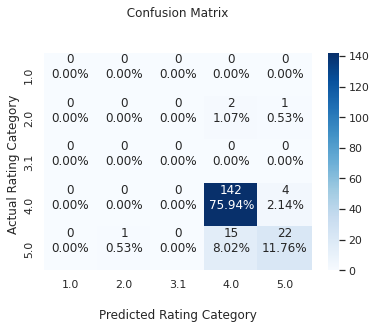

In [783]:
plot_confusion_matrix(y_val, y_pred_validation_FS_T1)

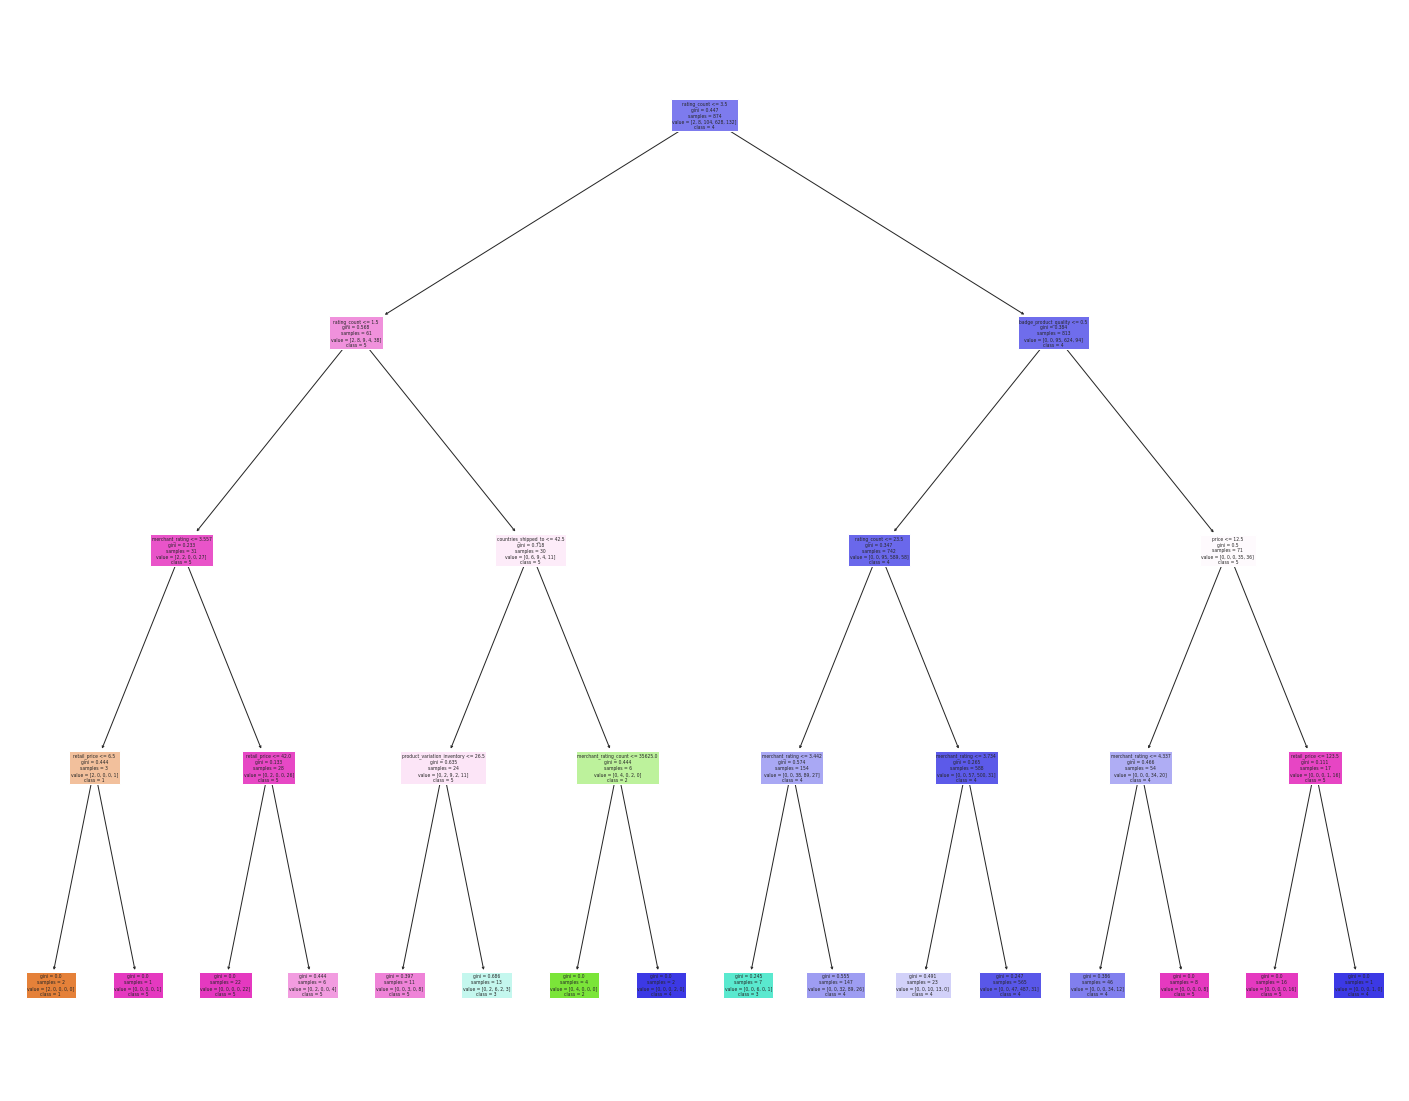

In [784]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(Dtree_FS_T1, 
                   feature_names=df_train_FS_x.columns,  
                   class_names=["1", "2", '3', '4', '5'],
                   filled=True)

In [785]:
y_predict_FS_T1=Dtree_FS_T1.predict(X_test_K)
y_predict_FS_T1

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 5., 1., 1., 1., 5.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 5., 1., 1., 1., 5., 1., 1., 1., 1., 1., 1., 5., 1.,
       1., 1., 1., 1., 1., 5., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 5.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 5., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 5., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [786]:
id=df_test_id['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': y_predict_FS_T1})

pred_df.to_csv('DS_FS_T1.csv', index=False)

test (kaggle) score is 74%

####trial  (apply GridSearch with DecionTree to obtain Parameters that give the best results)


In [787]:
parameters = [
              {'criterion':['gini', 'entropy']},
              {'max_depth':[2,4,6]}
              ]


grid_search_DT_FS = GridSearchCV(estimator = DecisionTreeClassifier(),  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           )


grid_search_DT_FS.fit(X_train, np.ravel(y_train))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy']},
                         {'max_depth': [2, 4, 6]}],
             scoring='accuracy')

In [788]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search_DT_FS.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search_DT_FS.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search_DT_FS.best_estimator_))

GridSearch CV best score : 0.7666


Parameters that give the best results : 

 {'max_depth': 4}


Estimator that was chosen by the search : 

 DecisionTreeClassifier(max_depth=4)


In [789]:
grid_search_DT_FS.best_estimator_.fit(X_train, np.ravel(y_train))

DecisionTreeClassifier(max_depth=4)

In [790]:
grid_search_DT_FS.best_estimator_.score(X_train, y_train)

0.8043478260869565

In [791]:
y_pred_validation_FS_T1=grid_search_DT_FS.best_estimator_.predict(X_val)

In [792]:
Accuracy=accuracy_score(y_val,y_pred_validation_FS_T1) #measzure the accuracy of the model
print("Accuracy:  " , (Accuracy))

Accuracy:   0.7579908675799086


In [793]:
print(classification_report(y_val,y_pred_validation_FS_T1))

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         4
         3.0       0.67      0.06      0.12        31
         4.0       0.77      0.97      0.86       146
         5.0       0.73      0.58      0.65        38

    accuracy                           0.76       219
   macro avg       0.54      0.40      0.41       219
weighted avg       0.73      0.76      0.70       219



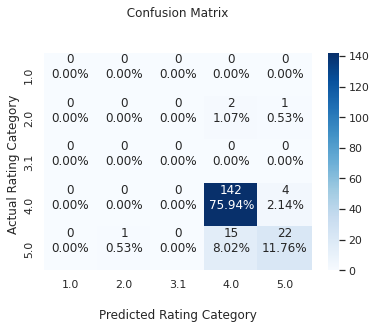

In [794]:
plot_confusion_matrix(y_val, y_pred_validation_FS_T1)

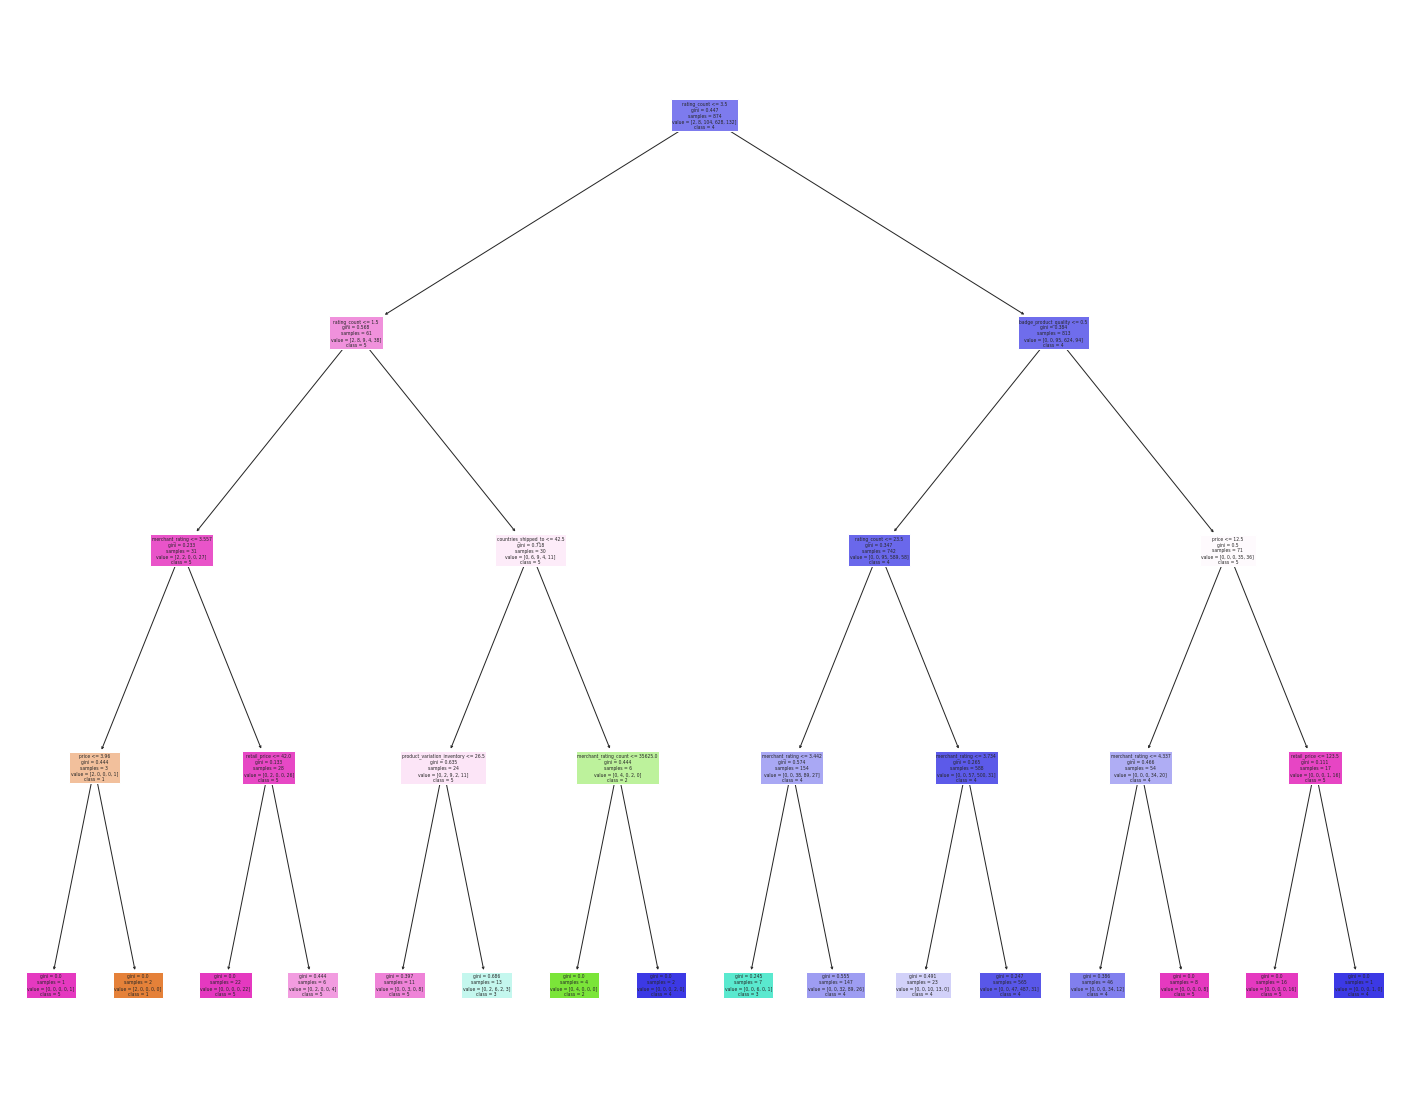

In [795]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(grid_search_DT_FS.best_estimator_, 
                   feature_names=df_train_FS_x.columns,  
                   class_names=["1", "2", '3', '4', '5'],
                   filled=True)

In [796]:
y_predict_FS_T2=grid_search_DT_FS.best_estimator_.predict(X_test_K)
y_predict_FS_T2

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 3., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 3., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5.

In [797]:
id=df_test_id['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': y_predict_FS_T2.astype(int)})

pred_df.to_csv('DT_GS_FS_T2.csv', index=False)

test (kaggle) score is 74%

####trial  ( Naive Bayes model)


In [798]:
from sklearn.naive_bayes import GaussianNB

In [799]:
naive_bayes_model_FS_T3 = GaussianNB(var_smoothing=0.43287612810830584)
naive_bayes_model_FS_T3.fit(X_train, y_train)

GaussianNB(var_smoothing=0.43287612810830584)

In [800]:
naive_bayes_model_FS_T3.score(X_train, y_train)

0.7128146453089245

In [801]:
y_pred_validation_FS_T3  =  naive_bayes_model_FS_T3.predict(X_val)


In [802]:
#measzure the accuracy of the model
Accuracy=accuracy_score(y_val,y_pred_validation_FS_T3) 
print("Accuracy:  " , (Accuracy))

Accuracy:   0.6666666666666666


In [803]:
print(classification_report(y_val,y_pred_validation_FS_T3))

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         4
         3.0       0.00      0.00      0.00        31
         4.0       0.67      1.00      0.80       146
         5.0       0.00      0.00      0.00        38

    accuracy                           0.67       219
   macro avg       0.17      0.25      0.20       219
weighted avg       0.44      0.67      0.53       219



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


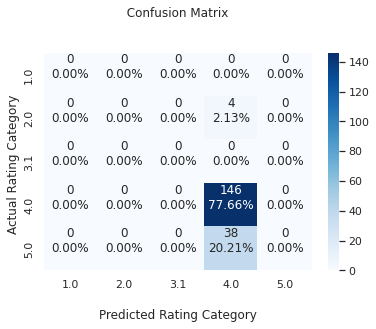

In [804]:
plot_confusion_matrix(y_val, y_pred_validation_FS_T3)

In [805]:
y_predict_FS_T3=naive_bayes_model_FS_T3.predict(X_test_K)
y_predict_FS_T3

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

In [806]:
id=df_test_id['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': y_predict_FS_T3})

pred_df.to_csv('NB_FS_T3.csv', index=False)

test (kaggle) score is 76%

####trial (apply GridSearch with naive_bayes to obtain Parameters that give the best results)

In [807]:
NB_parameters = [{'var_smoothing': np.logspace(0,-9, num=100)}
                ]


grid_search_NB_FS = GridSearchCV(estimator = naive_bayes_model_FS_T3,  
                           param_grid = NB_parameters,
                           scoring = 'accuracy',
                           )


grid_search_NB_FS.fit(X_train, np.ravel(y_train))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=GaussianNB(var_smoothing=0.43287612810830584),
             param_grid=[{'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.511...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])}],
             scoring='accuracy')

In [808]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search_NB_FS.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search_NB_FS.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search_NB_FS.best_estimator_))

GridSearch CV best score : 0.7151


Parameters that give the best results : 

 {'var_smoothing': 0.43287612810830584}


Estimator that was chosen by the search : 

 GaussianNB(var_smoothing=0.43287612810830584)


In [809]:
grid_search_NB_FS.best_estimator_.fit(X_train, np.ravel(y_train))

GaussianNB(var_smoothing=0.43287612810830584)

In [810]:
grid_search_NB_FS.best_estimator_.score(X_train, y_train)

0.7128146453089245

In [811]:
y_pred_validation_FS_T4  =  grid_search_NB_FS.best_estimator_.predict(X_val)

In [812]:
#measzure the accuracy of the model
Accuracy=accuracy_score(y_val,y_pred_validation_FS_T4) 
print("Accuracy:  " , (Accuracy))

Accuracy:   0.6666666666666666


In [813]:
print(classification_report(y_val,y_pred_validation_FS_T4))

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         4
         3.0       0.00      0.00      0.00        31
         4.0       0.67      1.00      0.80       146
         5.0       0.00      0.00      0.00        38

    accuracy                           0.67       219
   macro avg       0.17      0.25      0.20       219
weighted avg       0.44      0.67      0.53       219



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


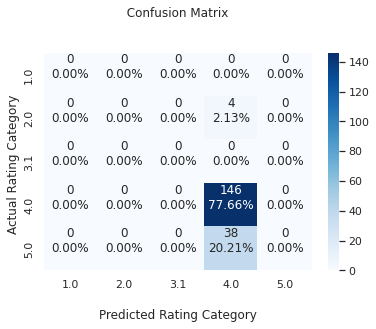

In [814]:
plot_confusion_matrix(y_val, y_pred_validation_FS_T4)

In [815]:
y_predict_FS_T4=grid_search_NB_FS.best_estimator_.predict(X_test_K)
y_predict_FS_T4

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

In [816]:
id=df_test_id['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': y_predict_FS_T4})

pred_df.to_csv('NB_GS_FS_T4.csv', index=False)

test (kaggle) score is 76%

####trial (SVC with a Linear Kernel) 

In [860]:
from sklearn import svm

In [851]:
from sklearn.svm import LinearSVC
# SVM regularization parameter
C = 1.0  

# : SVC with a Linear Kernel  
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)

In [852]:
svc.score(X_train, y_train)

0.6819221967963387

In [853]:
linear_y_pred_validation_FS_T5 = svc.predict(X_val)

In [854]:
linear_y_pred_validation_FS_T5

array([4., 4., 3., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 1., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4.,
       5., 4., 4., 4., 1., 1., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4.,
       4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 3., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 5., 4., 4., 4., 4., 5., 4., 4., 4., 4., 2., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 1., 4., 4., 4., 4., 4., 4., 3., 4., 4., 3.,
       4., 3., 4., 4., 4., 4., 1., 4., 4., 2., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 2., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 3., 4., 4., 4., 4., 4., 4., 3., 4., 3., 4., 4., 2., 4., 4., 4.,
       3., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 2., 4., 4., 4., 5., 4., 4., 3., 4., 3., 4., 4.])

In [855]:
#Accuracy
from sklearn.metrics import accuracy_score
#measzure the accuracy of the model
linear_Accuracy=accuracy_score(y_val,linear_y_pred_validation_FS_T5)

print("linear_Accuracy >>>>> " , (linear_Accuracy))

linear_Accuracy >>>>>  0.6484018264840182


In [856]:
print(classification_report(y_val,linear_y_pred_validation_FS_T5))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         4
         3.0       0.33      0.16      0.22        31
         4.0       0.72      0.92      0.80       146
         5.0       0.43      0.08      0.13        38

    accuracy                           0.65       219
   macro avg       0.30      0.23      0.23       219
weighted avg       0.60      0.65      0.59       219



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


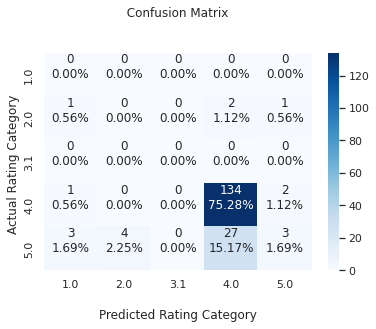

In [857]:
plot_confusion_matrix(y_val,linear_y_pred_validation_FS_T5)

In [858]:
linear_y_pred_FS_T5=svc.predict(X_test_K)
linear_y_pred_FS_T5

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


array([1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 3.,
       1., 1., 1., 1., 1., 3., 1., 3., 1., 1., 1., 1., 1., 1., 3., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 3., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 3.,
       1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1.,
       1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1.,
       3., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [859]:
id=df_test_id['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': linear_y_pred_FS_T5})

pred_df.to_csv('linear_svm_FS_T5.csv', index=False)

####trial (Gaussian Radial Bassis Function)

---



In [843]:

# SVM regularization parameter
C = 1.0  
# : Gaussian Radial Bassis Function
rbf_svc =   svm.SVC(kernel='rbf', C=C).fit(X_train, y_train)

In [844]:
rbf_svc.score(X_train, y_train)

0.7196796338672768

In [845]:
rbf_y_pred_validation_FS_T6= rbf_svc.predict(X_val)

In [846]:
#Accuracy
from sklearn.metrics import accuracy_score
#measzure the accuracy of the model
rbf_Accuracy=accuracy_score(y_val,rbf_y_pred_validation_FS_T6)
print("rbf_Accuracy    >>>>> " , (rbf_Accuracy))

rbf_Accuracy    >>>>>  0.6666666666666666


In [847]:
print(classification_report(y_val,rbf_y_pred_validation_FS_T6))

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         4
         3.0       0.00      0.00      0.00        31
         4.0       0.67      1.00      0.80       146
         5.0       0.00      0.00      0.00        38

    accuracy                           0.67       219
   macro avg       0.17      0.25      0.20       219
weighted avg       0.44      0.67      0.53       219



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


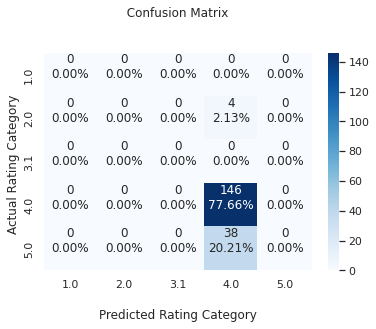

In [848]:
plot_confusion_matrix(y_val,rbf_y_pred_validation_FS_T6)

In [849]:
rbf_y_pred_FS_T6=rbf_svc.predict(X_test_K)
rbf_y_pred_FS_T6

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

In [850]:
id=df_test_id['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': rbf_y_pred_FS_T6})

pred_df.to_csv('rbf_svm_FS_T6.csv', index=False)

#### trial (SVC with 3rd degree poynomial)


In [835]:

# SVM regularization parameter
C = 1.0  
# : SVC with 3rd degree poynomial
poly_svc =  svm.SVC(kernel='poly', degree = 3,  C=C).fit(X_train, y_train)

In [836]:
poly_svc.score(X_train, y_train)

0.7196796338672768

In [837]:
poly_y_pred_validation_FS_T7= poly_svc.predict(X_val)

In [838]:
#Accuracy
from sklearn.metrics import accuracy_score
#measzure the accuracy of the model
poly_Accuracy=accuracy_score(y_val,poly_y_pred_validation_FS_T7)

print("poly_Accuracy   >>>>> " , (poly_Accuracy))

poly_Accuracy   >>>>>  0.6666666666666666


In [839]:
print(classification_report(y_val,poly_y_pred_validation_FS_T7))


              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         4
         3.0       0.00      0.00      0.00        31
         4.0       0.67      1.00      0.80       146
         5.0       0.00      0.00      0.00        38

    accuracy                           0.67       219
   macro avg       0.17      0.25      0.20       219
weighted avg       0.44      0.67      0.53       219



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


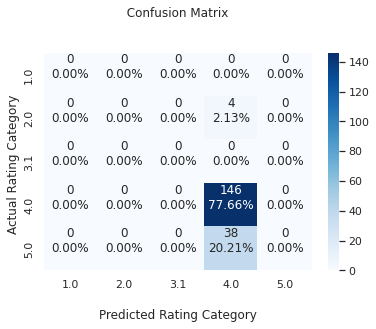

In [840]:
plot_confusion_matrix(y_val,poly_y_pred_validation_FS_T7)

In [841]:
poly_y_pred_FS_T7=poly_svc.predict(X_test_K)
poly_y_pred_FS_T7

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

In [842]:
id=df_test_id['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': poly_y_pred_FS_T7})

pred_df.to_csv('poly_svm_FS_T7.csv', index=False)

#### trial ( XGB)

In [861]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier


In [862]:
XGB_FS_T1=XGBClassifier(n_estimators=80,max_depth=10,
).fit(X_train.values, y_train.values)

In [863]:
XGB_FS_T1.score(X_train.values, y_train.values)

0.9954233409610984

In [864]:
y_pred_validation_XGB_FS_T1 = XGB_FS_T1.predict(X_val.values)


In [865]:
y_pred_validation_XGB_FS_T1

array([4., 4., 4., 4., 5., 5., 2., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 5., 4.,
       5., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4.,
       4., 5., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4.,
       5., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 3., 5., 4., 4., 4., 4.,
       4., 4., 4., 3., 4., 4., 4., 4., 5., 5., 4., 4., 4., 5., 4., 4., 4.,
       4., 4., 5., 4., 4., 4., 5., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 3., 4., 4., 4., 4., 5., 4., 5., 4., 3., 4., 4., 4., 4., 4., 4.,
       3., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 5., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 5., 3., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 5., 5., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 5., 3., 4., 4., 4., 4., 5., 4., 5., 4.,
       4., 4., 4., 5., 4., 4., 4., 5., 3., 4., 5., 4., 4., 4., 3.])

In [866]:

#Accuracy
from sklearn.metrics import accuracy_score

Accuracy=accuracy_score(y_val,y_pred_validation_XGB_FS_T1) #measzure the accuracy of the model
print("XGB_FS_T1_Accuracy:  " , (Accuracy))


XGB_FS_T1_Accuracy:   0.7853881278538812


In [867]:
print(classification_report(y_val,y_pred_validation_XGB_FS_T1))

              precision    recall  f1-score   support

         2.0       1.00      0.25      0.40         4
         3.0       0.71      0.32      0.44        31
         4.0       0.80      0.94      0.86       146
         5.0       0.75      0.63      0.69        38

    accuracy                           0.79       219
   macro avg       0.82      0.54      0.60       219
weighted avg       0.78      0.79      0.76       219



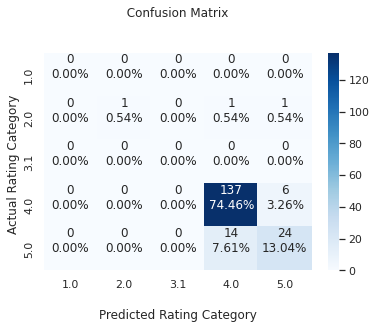

In [868]:
plot_confusion_matrix(y_val, y_pred_validation_XGB_FS_T1)

In [869]:
y_predict_XGB_FS_T1=XGB_FS_T1.predict(X_test_K)
y_predict_XGB_FS_T1

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 1., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 4., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5.

In [870]:
id=df_test_id['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': y_predict_XGB_FS_T1.astype(int)})

pred_df.to_csv('XGB_FS_T1.csv', index=False)

####trial (apply GridSearch with XGB to obtain Parameters that give the best results)

In [871]:
XGB_parameters = [
              {'n_estimators':[20,40,60,80]},
              {'max_depth':[5,15,25]}
              ]


grid_search_XGB_FS = GridSearchCV(estimator = XGBClassifier(),  
                           param_grid = XGB_parameters,
                           scoring = 'accuracy',
                           )


grid_search_XGB_FS.fit(X_train.values, np.ravel(y_train.values))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=XGBClassifier(),
             param_grid=[{'n_estimators': [20, 40, 60, 80]},
                         {'max_depth': [5, 15, 25]}],
             scoring='accuracy')

In [872]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search_XGB_FS.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search_XGB_FS.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search_XGB_FS.best_estimator_))

GridSearch CV best score : 0.7826


Parameters that give the best results : 

 {'max_depth': 25}


Estimator that was chosen by the search : 

 XGBClassifier(max_depth=25, objective='multi:softprob')


In [873]:
grid_search_XGB_FS.best_estimator_.fit(X_train.values, np.ravel(y_train.values))

XGBClassifier(max_depth=25, objective='multi:softprob')

In [874]:
grid_search_XGB_FS.best_estimator_.score(X_train.values, np.ravel(y_train.values))

0.9954233409610984

In [875]:
y_pred_validation_XGB_GS_FS=grid_search_XGB_FS.best_estimator_.predict(X_val.values)

In [876]:
Accuracy=accuracy_score(y_val,y_pred_validation_XGB_GS_FS) #measzure the accuracy of the model
print("grid_search_XGB_FS_Accuracy:  " , (Accuracy))

grid_search_XGB_FS_Accuracy:   0.7853881278538812


In [877]:
print(classification_report(y_val,y_pred_validation_XGB_GS_FS))

              precision    recall  f1-score   support

         2.0       1.00      0.25      0.40         4
         3.0       0.75      0.29      0.42        31
         4.0       0.80      0.95      0.87       146
         5.0       0.72      0.61      0.66        38

    accuracy                           0.79       219
   macro avg       0.82      0.52      0.59       219
weighted avg       0.78      0.79      0.76       219



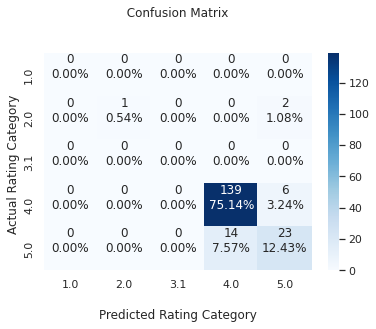

In [878]:
plot_confusion_matrix(y_val, y_pred_validation_XGB_GS_FS)

In [879]:
y_predict_XGB_GS_FS=grid_search_XGB_FS.best_estimator_.predict(X_test_K)
y_predict_XGB_GS_FS

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5.

In [880]:
id=df_test_id['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': y_predict_XGB_GS_FS})

pred_df.to_csv('XGB_GS_FS.csv', index=False)

####trial  ( Random Forest)

In [881]:
from sklearn.ensemble import RandomForestClassifier

In [882]:
RF_FS_T1=RandomForestClassifier().fit(X_train, y_train)

In [883]:
RF_FS_T1.score(X_train, y_train)

0.9954233409610984

In [884]:
y_pred_validation_RF_FS_T1 = RF_FS_T1.predict(X_val)

In [885]:
y_pred_validation_RF_FS_T1

array([4., 4., 4., 4., 5., 5., 2., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 5., 4.,
       5., 4., 4., 4., 4., 5., 5., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4.,
       4., 5., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4.,
       5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4.,
       4., 4., 4., 3., 4., 4., 4., 4., 5., 5., 4., 4., 4., 5., 4., 4., 4.,
       4., 4., 5., 4., 4., 4., 5., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 3., 4., 4., 4., 4., 5., 4., 5., 5., 3., 4., 4., 4., 4., 4., 4.,
       3., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 5., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 3., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 5., 5., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 5., 3., 4., 4., 4., 4., 5., 4., 4., 4.,
       4., 4., 4., 5., 4., 4., 4., 5., 4., 4., 5., 4., 4., 4., 4.])

In [886]:
#Accuracy
from sklearn.metrics import accuracy_score
Accuracy=accuracy_score(y_val,y_pred_validation_RF_FS_T1)
print("RF_FS_T1_Accuracy:  " , (Accuracy))

RF_FS_T1_Accuracy:   0.7853881278538812


In [887]:
print(classification_report(y_val,y_pred_validation_RF_FS_T1))

              precision    recall  f1-score   support

         2.0       1.00      0.25      0.40         4
         3.0       0.89      0.26      0.40        31
         4.0       0.80      0.96      0.87       146
         5.0       0.70      0.61      0.65        38

    accuracy                           0.79       219
   macro avg       0.85      0.52      0.58       219
weighted avg       0.80      0.79      0.76       219



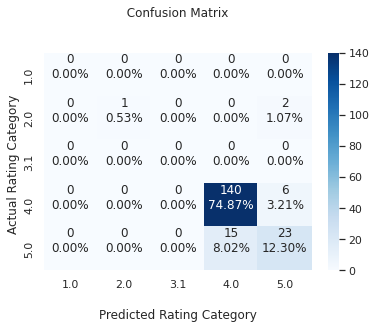

In [888]:
plot_confusion_matrix(y_val, y_pred_validation_RF_FS_T1)

In [889]:
y_predict_RF_FS_T1=RF_FS_T1.predict(X_test_K)
y_predict_RF_FS_T1

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5.

In [890]:
id=df_test_id['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': y_predict_RF_FS_T1})

pred_df.to_csv('RF_FS_T1.csv', index=False)

####trial (applyGridSearch with Random Forest to obtain Parameters that give the best results)

In [891]:
XGB_parameters = [
              {'n_estimators':[20,40,60,80]},
              {'max_features':['auto', 'sqrt', 'log2']}
              ]

grid_search_RF_FS = GridSearchCV(estimator = RandomForestClassifier(),  
                           param_grid = XGB_parameters,
                           scoring = 'accuracy',
                           )


grid_search_RF_FS.fit(X_train, np.ravel(y_train))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'n_estimators': [20, 40, 60, 80]},
                         {'max_features': ['auto', 'sqrt', 'log2']}],
             scoring='accuracy')

In [892]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search_RF_FS.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search_RF_FS.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search_RF_FS.best_estimator_))

GridSearch CV best score : 0.7986


Parameters that give the best results : 

 {'n_estimators': 40}


Estimator that was chosen by the search : 

 RandomForestClassifier(n_estimators=40)


In [893]:
grid_search_RF_FS.best_estimator_.fit(X_train, np.ravel(y_train))

RandomForestClassifier(n_estimators=40)

In [894]:
grid_search_RF_FS.best_estimator_.score(X_train, y_train)

0.994279176201373

In [895]:
y_pred_validation_RF_GS_FS=grid_search_RF_FS.best_estimator_.predict(X_val)

In [896]:
Accuracy=accuracy_score(y_val,y_pred_validation_RF_GS_FS) #measzure the accuracy of the model
print("grid_search_RF_FS_Accuracy:  " , (Accuracy))

grid_search_RF_FS_Accuracy:   0.7853881278538812


In [897]:
print(classification_report(y_val,y_pred_validation_RF_GS_FS))

              precision    recall  f1-score   support

         2.0       1.00      0.25      0.40         4
         3.0       0.73      0.26      0.38        31
         4.0       0.79      0.96      0.87       146
         5.0       0.77      0.61      0.68        38

    accuracy                           0.79       219
   macro avg       0.82      0.52      0.58       219
weighted avg       0.78      0.79      0.76       219



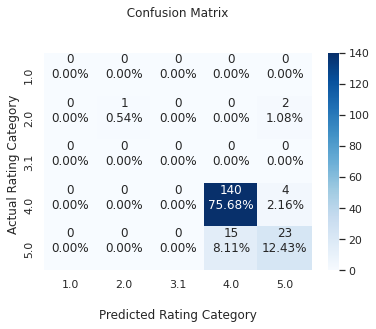

In [898]:
plot_confusion_matrix(y_val, y_pred_validation_RF_GS_FS)

In [899]:
y_predict_RF_GS_FS=grid_search_RF_FS.best_estimator_.predict(X_test_K)
y_predict_RF_GS_FS

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5.

In [900]:
id=df_test_id['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': y_predict_RF_GS_FS})

pred_df.to_csv('RF_GS_FS.csv', index=False)

#Second Solution

predict the product ratings given the other features known for a product on Wish.com based on numerical features and apply preprocessing encoder (preprocessing.LabelEncoder() on categorical features (['product_color', 'product_variation_size_id', 'origin_country','tags_simple'])

###prepare data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [296]:
df_train_SS=df_train

In [297]:
df_test_SS_K=df_test

In [298]:
df_train_SS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 1093
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        1093 non-null   float64
 1   retail_price                 1093 non-null   int64  
 2   units_sold                   1093 non-null   int64  
 3   uses_ad_boosts               1093 non-null   int64  
 4   rating                       1093 non-null   float64
 5   rating_count                 1093 non-null   int64  
 6   badges_count                 1093 non-null   int64  
 7   badge_local_product          1093 non-null   int64  
 8   badge_product_quality        1093 non-null   int64  
 9   badge_fast_shipping          1093 non-null   int64  
 10  product_color                1093 non-null   object 
 11  product_variation_size_id    1093 non-null   object 
 12  product_variation_inventory  1093 non-null   int64  
 13  shipping_option_pr

In [299]:
df_train_SS.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,countries_shipped_to,merchant_rating_count,merchant_rating
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1.093000e+03,1093.000000
mean,8.283568,23.695334,4522.753888,0.432754,4.004575,916.355901,0.113449,0.019213,0.083257,0.010979,32.835316,2.335773,40.483989,2.678107e+04,4.036020
std,3.836460,31.812401,9829.173414,0.495684,0.582857,2038.307907,0.347588,0.137336,0.276397,0.104251,21.444202,1.003552,20.205469,8.620109e+04,0.200409
min,1.000000,2.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.000000,4.000000e+00,2.941176
25%,5.830000,7.000000,100.000000,0.000000,4.000000,24.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,31.000000,1.926000e+03,3.918367
50%,8.000000,10.000000,1000.000000,0.000000,4.000000,144.000000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,40.000000,8.225000e+03,4.045170
75%,11.000000,26.000000,5000.000000,1.000000,4.000000,846.000000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,43.000000,2.276500e+04,4.166509
max,27.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,3.000000,1.000000,1.000000,1.000000,50.000000,7.000000,140.000000,2.174765e+06,4.577519


Text(0.5, 1.0, 'Correlation Matrix')

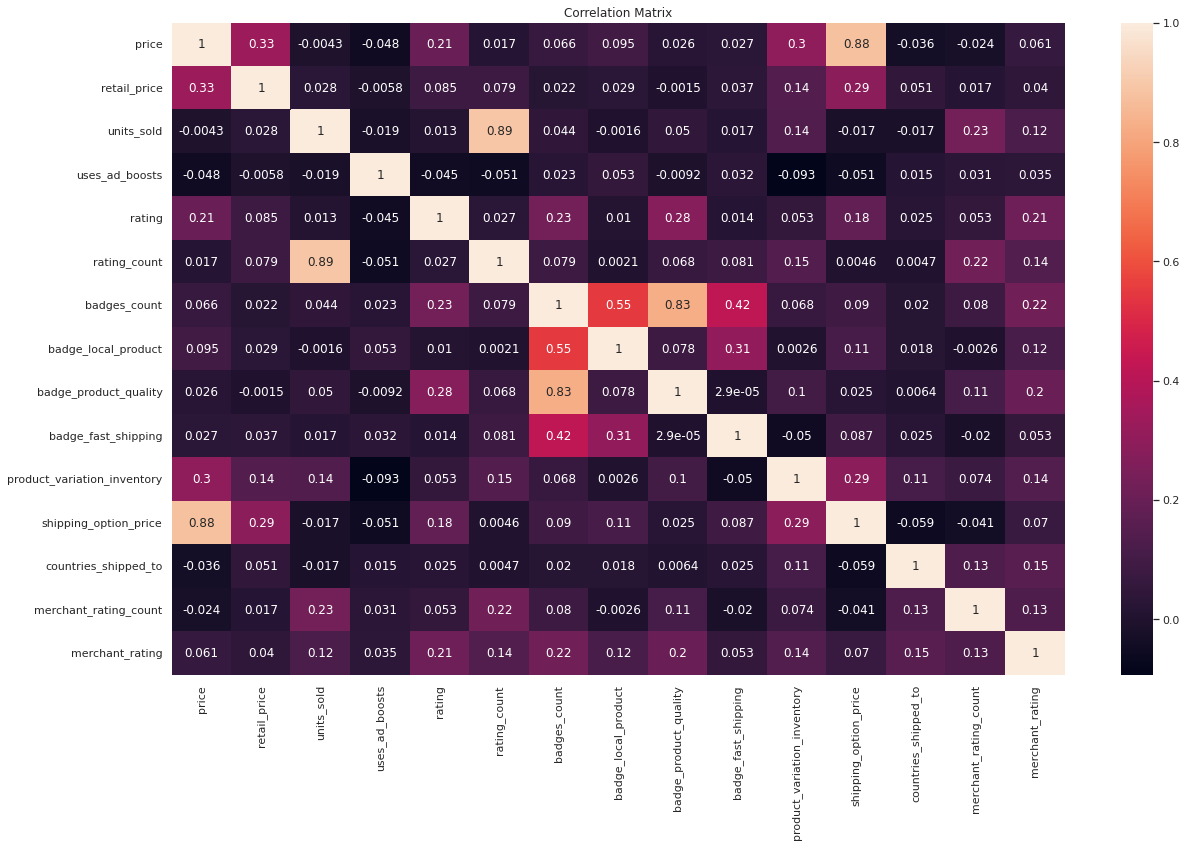

In [300]:
plt.rcParams["figure.figsize"] = (20,12) # Custom figure size in inches
sns.heatmap(df_train_SS.corr(), annot =True)
plt.title('Correlation Matrix')

In [301]:
df_train_SS_num=df_train._get_numeric_data()

In [302]:
df_train_SS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 1093
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        1093 non-null   float64
 1   retail_price                 1093 non-null   int64  
 2   units_sold                   1093 non-null   int64  
 3   uses_ad_boosts               1093 non-null   int64  
 4   rating                       1093 non-null   float64
 5   rating_count                 1093 non-null   int64  
 6   badges_count                 1093 non-null   int64  
 7   badge_local_product          1093 non-null   int64  
 8   badge_product_quality        1093 non-null   int64  
 9   badge_fast_shipping          1093 non-null   int64  
 10  product_color                1093 non-null   object 
 11  product_variation_size_id    1093 non-null   object 
 12  product_variation_inventory  1093 non-null   int64  
 13  shipping_option_pr

In [303]:
# categorical features 
df_train_SS_cat = df_train.select_dtypes(include=['category','object'])
df_test_SS_cat = df_test.select_dtypes(include=['category','object'])

In [304]:
df_train_SS_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 1093
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   product_color              1093 non-null   object
 1   product_variation_size_id  1093 non-null   object
 2   origin_country             1093 non-null   object
 3   tags_simple                1093 non-null   object
 4   product_category           1093 non-null   object
dtypes: object(5)
memory usage: 51.2+ KB


In [305]:
df_train_SS_cat.columns

Index(['product_color', 'product_variation_size_id', 'origin_country',
       'tags_simple', 'product_category'],
      dtype='object')

In [306]:
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [307]:
features = ['product_color', 'product_variation_size_id', 'origin_country',
       'tags_simple', 'product_category']

In [308]:
for column in features:
    df_train_SS[column]= label_encoder.fit_transform(df_train_SS[column])

In [309]:
df_train_SS.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,countries_shipped_to,origin_country,merchant_rating_count,merchant_rating,tags_simple,product_category
0,8.00,7,10000,1,4.0,1670,0,0,0,0,13,1,50,3,30,0,66644,4.137582,10,1
1,8.00,7,1000,0,4.0,843,1,1,0,0,1,0,50,3,37,0,25752,4.256873,9,1
2,6.00,34,100,0,4.0,10,0,0,0,0,12,0,50,2,41,0,3897,3.928920,10,1
3,4.67,4,100,1,3.0,82,0,0,0,0,2,5,5,1,25,0,7497,4.079365,9,0
4,8.00,11,1000,0,4.0,127,0,0,0,0,7,3,50,3,15,0,173,4.306358,1,1


In [310]:
data_train_SS_x = df_train_SS.loc[:, df_train_SS.columns !='rating']
data_train_SS_y=df_train_SS['rating']

In [311]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
data_train_SS_x = preprocessing.scale(data_train_SS_x)


In [312]:
data_train_SS_x.shape

(1093, 19)

In [313]:
from sklearn.model_selection import train_test_split
X_train_SS, X_val_SS, y_train_SS, y_val_SS = train_test_split(data_train_SS_x, data_train_SS_y, test_size=0.2, random_state=42,shuffle=True)

In [314]:
print("X_train_SS.shape >>>>> ",X_train_SS.shape)
print("y_train_SS.shape >>>>> ",y_train_SS.shape)
print("X_val_SS.shape >>>>> ",X_val_SS.shape)
print("y_val_SS.shape >>>>> ",y_val_SS.shape)


X_train_SS.shape >>>>>  (874, 19)
y_train_SS.shape >>>>>  (874,)
X_val_SS.shape >>>>>  (219, 19)
y_val_SS.shape >>>>>  (219,)


In [315]:
df_test_SS_K.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        479 non-null    float64
 1   retail_price                 479 non-null    int64  
 2   units_sold                   479 non-null    int64  
 3   uses_ad_boosts               479 non-null    int64  
 4   rating_count                 479 non-null    int64  
 5   badges_count                 479 non-null    int64  
 6   badge_local_product          479 non-null    int64  
 7   badge_product_quality        479 non-null    int64  
 8   badge_fast_shipping          479 non-null    int64  
 9   product_color                479 non-null    object 
 10  product_variation_size_id    479 non-null    object 
 11  product_variation_inventory  479 non-null    int64  
 12  shipping_option_price        479 non-null    int64  
 13  countries_shipped_to

In [316]:
features = ['product_color', 'product_variation_size_id', 'origin_country',
       'tags_simple', 'product_category']

In [317]:
for column in features:
    df_test_SS_K[column]= label_encoder.fit_transform(df_test_SS_K[column])

In [318]:
df_test_SS_K.head()

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,countries_shipped_to,origin_country,merchant_rating_count,merchant_rating,tags_simple,product_category
0,5.75,5,10,1,0,0,0,0,0,12,5,5,2,139,0,3,2.333333,5,1
1,7.00,7,5000,0,579,0,0,0,0,1,5,50,2,31,0,4213,4.058391,1,1
2,5.00,16,1000,1,62,0,0,0,0,2,5,20,2,41,0,10501,4.029235,9,1
3,18.00,27,5000,1,1903,0,0,0,0,2,1,50,5,42,0,15855,4.052917,4,0
4,12.00,81,20000,0,1799,0,0,0,0,12,1,50,3,38,0,151914,4.127921,1,1


In [319]:
X_test_K_SS=df_test_SS_K

In [320]:
X_test_K_SS = preprocessing.scale(X_test_K_SS)

In [321]:
print("X_test_K_SS.shape >>>>> ",X_test_K_SS.shape)

X_test_K_SS.shape >>>>>  (479, 19)


###imp

In [902]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,roc_curve
from sklearn.metrics import precision_score,precision_recall_curve,recall_score,f1_score,accuracy_score

In [376]:
def plot_confusion_matrix(y_test, y_pred):
  #Get the confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred,labels=[1.0,2.0,3.1,4.0,5.0])
 
  #print(cf_matrix)
     
  group_counts = ["{0:0.0f}".format(value) for value in
      cf_matrix.flatten()]

  group_percentages = ["{0:.2%}".format(value) for value in
            cf_matrix.flatten()/np.sum(cf_matrix)]

  labels = [f"{v1}\n{v2}\n" for v1, v2 in
  zip(group_counts,group_percentages)]

  labels = np.asarray(labels).reshape(5,5)

  ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

  ax.set_title('  Confusion Matrix  \n\n');
  ax.set_xlabel('\nPredicted Rating Category')
  ax.set_ylabel('Actual Rating Category ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels([1.0,2.0,3.1,4.0,5.0])
  ax.yaxis.set_ticklabels([1.0,2.0,3.1,4.0,5.0])

  ## Display the visualization of the Confusion Matrix.
  plt.show()

In [377]:
#visualization for roc_curve
from sklearn.metrics import roc_curve , roc_auc_score
def plot_roc_curve(y_test, y_pred):
  #calculate and virtualize the roc curve for the test set
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)
  plt.plot(fpr, tpr, 'r', label = 'AUC = %0.4f' % roc_auc)
  plt.plot(fpr, tpr, color='red', label='')
  plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.legend(loc = 'lower right')
  plt.grid()

##trails

###trial (Decision tree model)




In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [378]:
Dtree_SS_T1 = DecisionTreeClassifier(criterion='gini', max_depth=4) 
Dtree_SS_T1.fit(X_train_SS, y_train_SS)

DecisionTreeClassifier(max_depth=4)

In [379]:
Dtree_SS_T1.score(X_train_SS, y_train_SS)

0.8043478260869565

In [380]:
y_pred_validation_SS_T1 = Dtree_SS_T1.predict(X_val_SS)


In [381]:
y_pred_validation_SS_T1

array([4., 4., 4., 4., 5., 3., 3., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       5., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4.,
       4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4.,
       4., 4., 4., 3., 4., 4., 4., 4., 5., 5., 4., 4., 4., 5., 4., 4., 4.,
       4., 4., 5., 4., 4., 4., 2., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4.,
       5., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 5., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 5., 5., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 5., 4., 5., 4.,
       4., 4., 4., 5., 4., 4., 4., 5., 4., 4., 3., 4., 4., 4., 4.])

In [382]:
#Accuracy
from sklearn.metrics import accuracy_score
#measzure the accuracy of the model
Accuracy=accuracy_score(y_val_SS,y_pred_validation_SS_T1) 
print("Accuracy:  " , (Accuracy))


Accuracy:   0.7625570776255708


In [383]:
print(classification_report(y_val_SS,y_pred_validation_SS_T1))

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         4
         3.0       0.50      0.13      0.21        31
         4.0       0.77      0.97      0.86       146
         5.0       0.84      0.55      0.67        38

    accuracy                           0.76       219
   macro avg       0.53      0.41      0.43       219
weighted avg       0.73      0.76      0.72       219



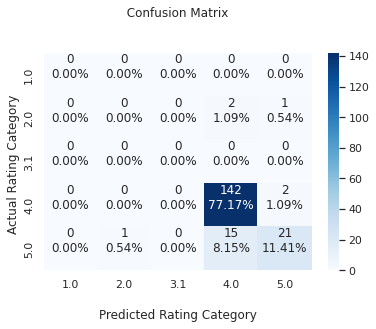

In [384]:
plot_confusion_matrix(y_val_SS, y_pred_validation_SS_T1)

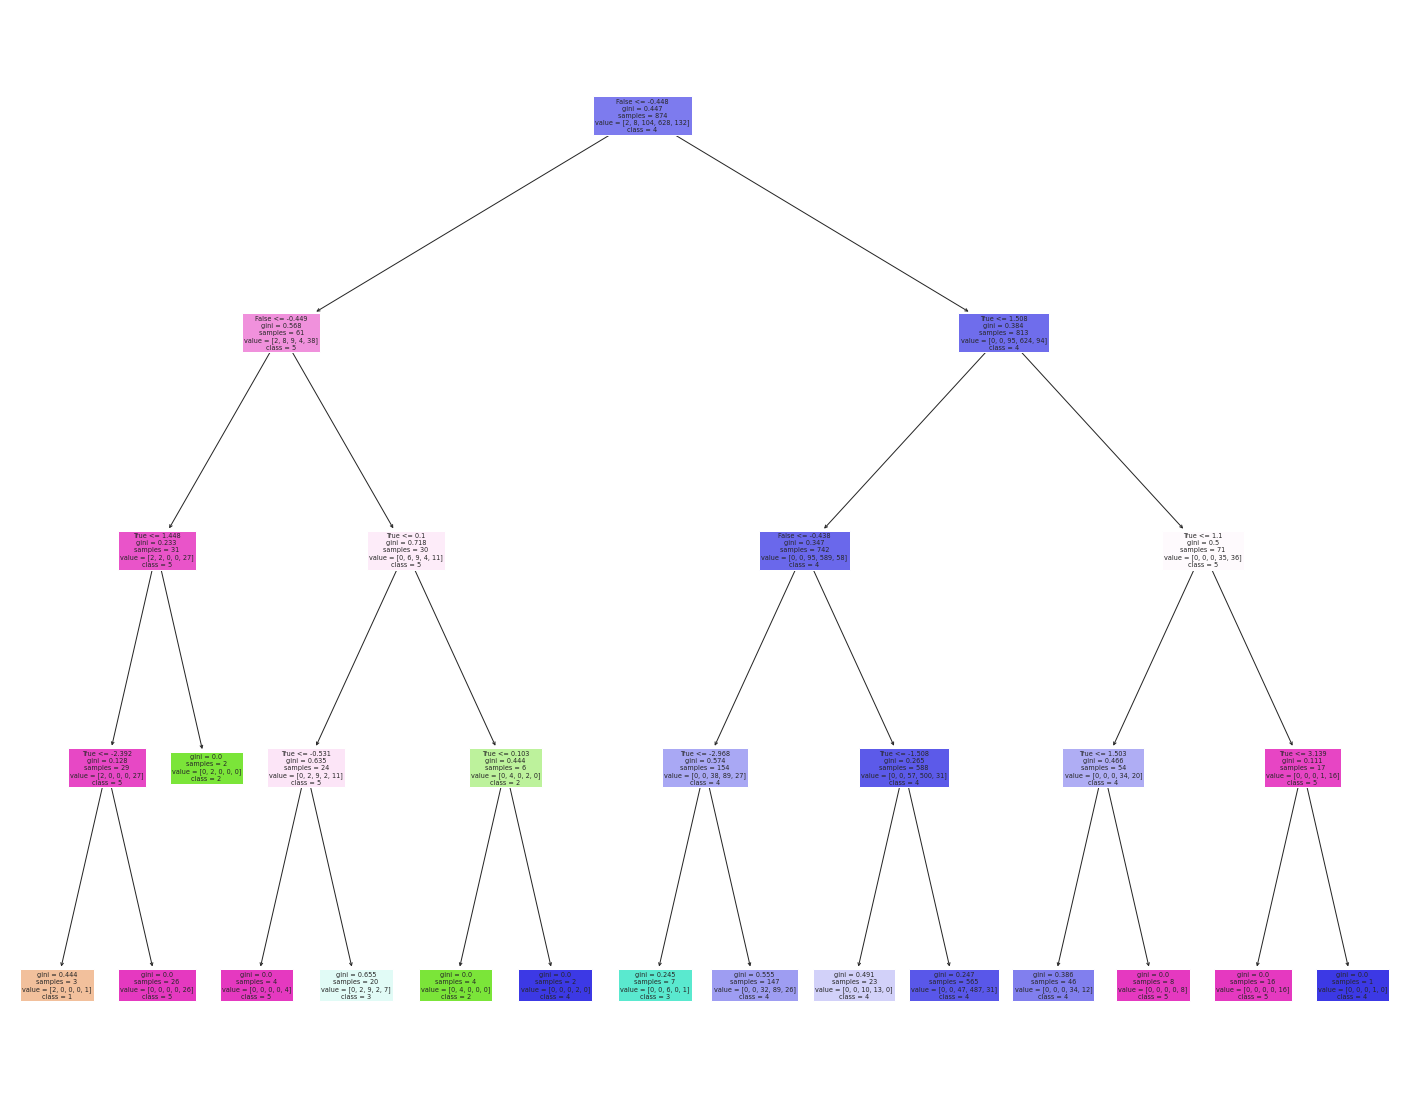

In [385]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(Dtree_SS_T1, 
                   feature_names=(df_train_SS.columns !='rating'),  
                   class_names=["1", "2", '3', '4', '5'],
                   filled=True)

In [386]:
y_predict_SS_T1=Dtree_SS_T1.predict(X_test_K_SS)
y_predict_SS_T1

array([3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

In [387]:
id=df_test_id['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': y_predict_SS_T1})

pred_df.to_csv('SS_DT_T1.csv', index=False)

test (kaggle) score is 76%

###trial  (apply GridSearch with DecionTree to obtain Parameters that give the best results)


In [388]:
parameters = [
              {'criterion':['gini', 'entropy']},
              {'max_depth':[2,4,6]}
              ]


grid_search_DT_SS = GridSearchCV(estimator = DecisionTreeClassifier(),  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           )


grid_search_DT_SS.fit(X_train_SS, np.ravel(y_train_SS))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy']},
                         {'max_depth': [2, 4, 6]}],
             scoring='accuracy')

In [389]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search_DT_SS.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search_DT_SS.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search_DT_SS.best_estimator_))

GridSearch CV best score : 0.7689


Parameters that give the best results : 

 {'max_depth': 4}


Estimator that was chosen by the search : 

 DecisionTreeClassifier(max_depth=4)


In [390]:
grid_search_DT_SS.best_estimator_.fit(X_train_SS, np.ravel(y_train_SS))

DecisionTreeClassifier(max_depth=4)

In [391]:
grid_search_DT_SS.best_estimator_.score(X_train_SS,y_train_SS)

0.8043478260869565

In [392]:
y_pred_validation_SS_T1=grid_search_DT_SS.best_estimator_.predict(X_val_SS)

In [393]:
Accuracy=accuracy_score(y_val_SS,y_pred_validation_SS_T1)
print("DecisionTree_gs_Accuracy:  " , (Accuracy))

DecisionTree_gs_Accuracy:   0.7625570776255708


In [394]:
print(classification_report(y_val_SS,y_pred_validation_SS_T1))

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         4
         3.0       0.50      0.13      0.21        31
         4.0       0.76      0.97      0.86       146
         5.0       0.84      0.55      0.67        38

    accuracy                           0.76       219
   macro avg       0.53      0.41      0.43       219
weighted avg       0.73      0.76      0.71       219



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


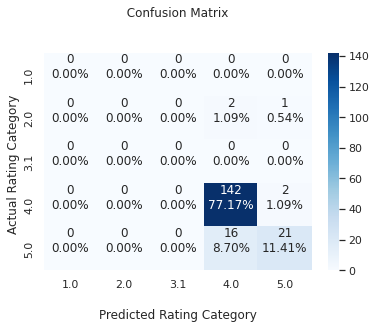

In [395]:
plot_confusion_matrix(y_val_SS, y_pred_validation_SS_T1)

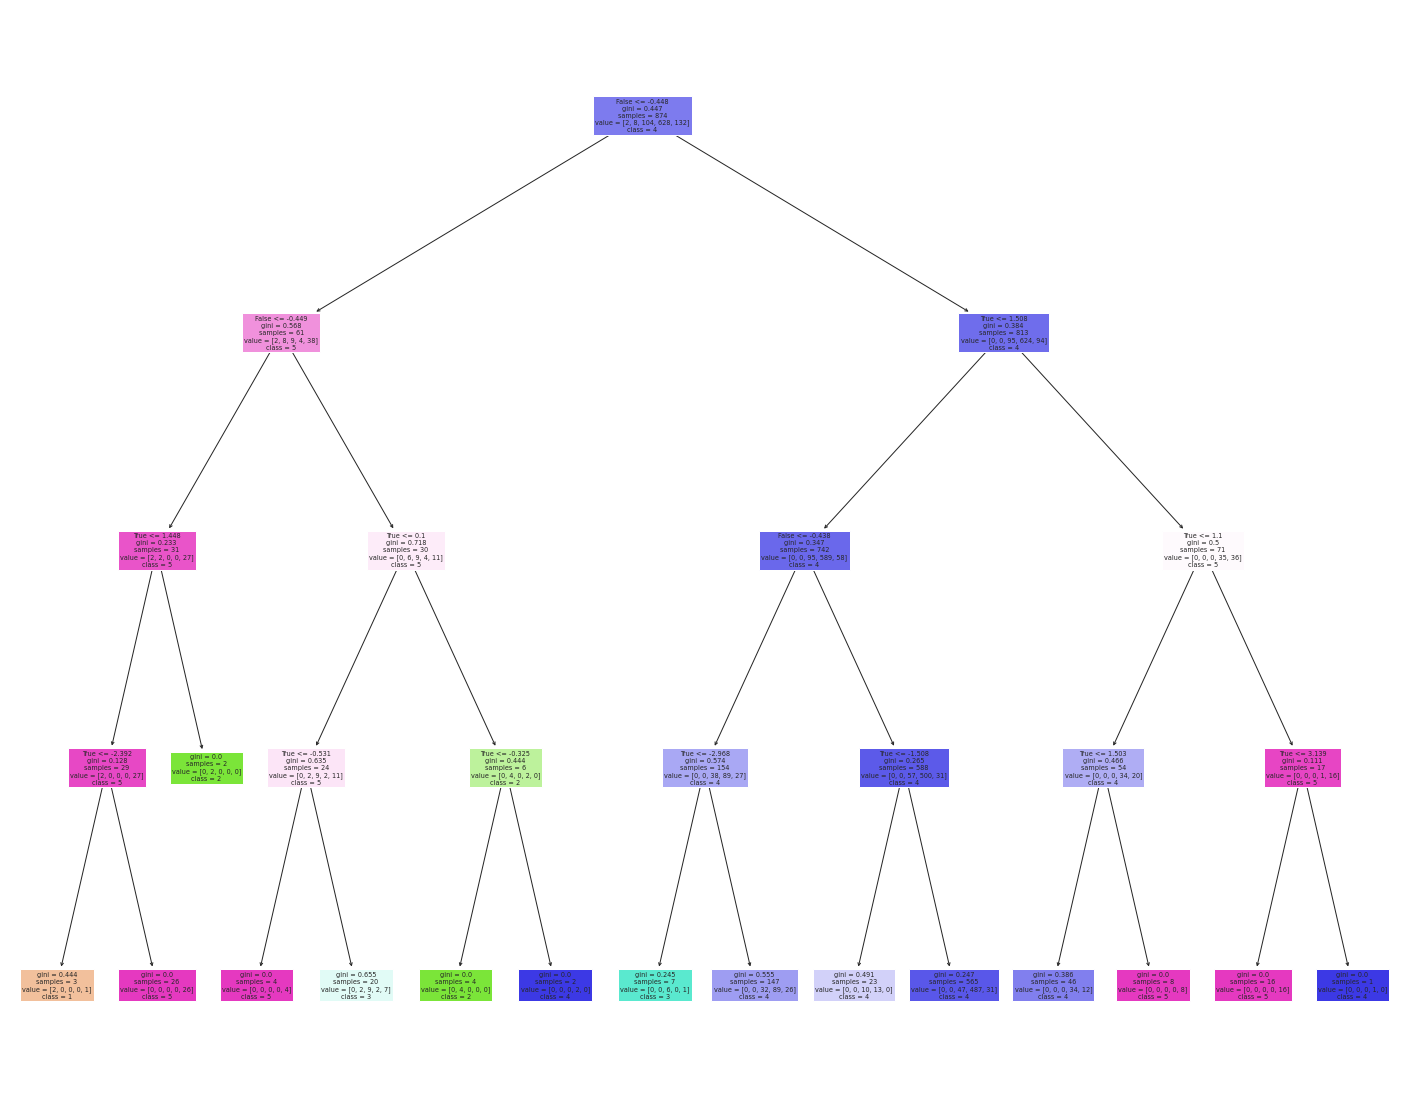

In [396]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(grid_search_DT_SS.best_estimator_, 
                   feature_names=(df_train_SS.columns !='rating'),  
                   class_names=["1", "2", '3', '4', '5'],
                   filled=True)

In [397]:
y_predict_SS_T2=grid_search_DT_SS.best_estimator_.predict(X_test_K_SS)
y_predict_SS_T2

array([3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

In [398]:
id=df_test_id['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': y_predict_SS_T2})

pred_df.to_csv('SS_DT_gs_T2.csv', index=False)

test (kaggle) score is 76%

###trial (Naive Bayes model)


In [408]:
from sklearn.naive_bayes import GaussianNB

In [409]:
naive_bayes_model_SS_T1 = GaussianNB(var_smoothing=0.43287612810830584)
naive_bayes_model_SS_T1.fit(X_train_SS, y_train_SS)

GaussianNB(var_smoothing=0.43287612810830584)

In [410]:
naive_bayes_model_SS_T1.score(X_train_SS, y_train_SS)

0.6270022883295194

In [411]:
y_pred_validation_SS_NB_T1  =  naive_bayes_model_SS_T1.predict(X_val_SS)

In [412]:
#measzure the accuracy of the model
Accuracy=accuracy_score(y_val_SS,y_pred_validation_SS_NB_T1) 
print("naive_bayes_model_SS_T1_Accuracy:  " , (Accuracy))

naive_bayes_model_SS_T1_Accuracy:   0.6210045662100456


In [413]:
print(classification_report(y_val_SS,y_pred_validation_SS_NB_T1))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         4
         3.0       0.31      0.29      0.30        31
         4.0       0.74      0.79      0.76       146
         5.0       0.55      0.32      0.40        38

    accuracy                           0.62       219
   macro avg       0.32      0.28      0.29       219
weighted avg       0.63      0.62      0.62       219



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


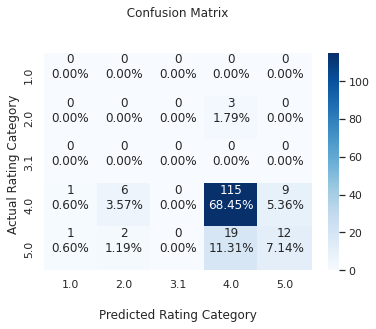

In [414]:
plot_confusion_matrix(y_val_SS, y_pred_validation_SS_NB_T1)

In [415]:
y_predict_SS_NB_T1=naive_bayes_model_SS_T1.predict(X_test_K_SS)
y_predict_SS_NB_T1

array([3., 4., 4., 5., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5.,
       4., 1., 4., 4., 4., 3., 4., 4., 3., 4., 5., 4., 4., 4., 2., 4., 4.,
       4., 4., 4., 4., 3., 1., 5., 4., 2., 4., 4., 3., 4., 4., 3., 4., 5.,
       3., 4., 3., 4., 4., 4., 3., 3., 4., 5., 3., 2., 4., 4., 4., 4., 4.,
       4., 4., 3., 4., 4., 4., 2., 2., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       3., 4., 4., 4., 5., 3., 4., 5., 5., 5., 5., 4., 3., 3., 4., 4., 4.,
       4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 2.,
       4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 2., 4., 4., 4.,
       4., 4., 5., 2., 4., 4., 4., 5., 5., 4., 4., 4., 4., 4., 4., 1., 4.,
       4., 3., 4., 4., 4., 4., 4., 3., 5., 4., 4., 4., 4., 4., 3., 5., 5.,
       4., 4., 5., 2., 4., 4., 4., 4., 3., 4., 4., 4., 4., 3., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 3., 2., 1., 1., 4., 4., 5., 2., 4.,
       4., 4., 4., 2., 3., 4., 4., 5., 4., 4., 5., 4., 4., 4., 4., 4., 3.,
       4., 4., 4., 3., 4.

In [416]:
id=df_test_id['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': y_predict_SS_NB_T1})

pred_df.to_csv('SS_NB_T1.csv', index=False)

test (kaggle) score is 66%

###trial  (apply GridSearch with naive_bayes to obtain Parameters that give the best results)

In [417]:
NB_parameters = [{'var_smoothing': np.logspace(0,-9, num=100)}
                ]


grid_search_NB_SS = GridSearchCV(estimator = GaussianNB(),  
                           param_grid = NB_parameters,
                           scoring = 'accuracy',
                           )


grid_search_NB_SS.fit(X_train_SS, np.ravel(y_train_SS))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=GaussianNB(),
             param_grid=[{'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.310129...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])}],
             scoring='accuracy')

In [418]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search_NB_SS.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search_NB_SS.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search_NB_SS.best_estimator_))

GridSearch CV best score : 0.7116


Parameters that give the best results : 

 {'var_smoothing': 1.0}


Estimator that was chosen by the search : 

 GaussianNB(var_smoothing=1.0)


In [419]:
grid_search_NB_SS.best_estimator_.fit(X_train_SS, np.ravel(y_train_SS))

GaussianNB(var_smoothing=1.0)

In [420]:
grid_search_NB_SS.best_estimator_.score(X_train_SS,y_train_SS)

0.7151029748283753

In [421]:
y_pred_validation_SS_NB_T2  =  grid_search_NB_SS.best_estimator_.predict(X_val_SS)

In [422]:
#measzure the accuracy of the model
Accuracy=accuracy_score(y_val_SS,y_pred_validation_SS_NB_T2) 
print("Accuracy:  " , (Accuracy))

Accuracy:   0.7077625570776256


In [423]:
print(classification_report(y_val_SS,y_pred_validation_SS_NB_T2))

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         4
         3.0       0.67      0.13      0.22        31
         4.0       0.72      0.97      0.82       146
         5.0       0.71      0.26      0.38        38

    accuracy                           0.71       219
   macro avg       0.52      0.34      0.36       219
weighted avg       0.70      0.71      0.65       219



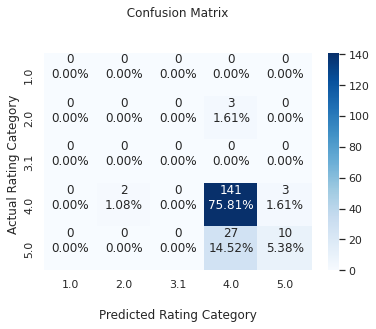

In [424]:
plot_confusion_matrix(y_val_SS, y_pred_validation_SS_NB_T2)

In [425]:
y_predict_FS_NB_T2=grid_search_NB_SS.best_estimator_.predict(X_test_K_SS)
y_predict_FS_NB_T2

array([3., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5.,
       4., 1., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 2., 4., 4.,
       4., 4., 4., 4., 4., 1., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 3., 4., 4., 4., 3., 3., 4., 4., 4., 2., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 3., 4., 4., 4., 5., 5., 4., 3., 4., 4., 4., 4.,
       4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 5., 2., 4., 4., 4., 5., 5., 4., 4., 4., 4., 4., 4., 1., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 3., 5., 5.,
       4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 1., 4., 4., 5., 4., 4.,
       4., 4., 4., 2., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 3., 4.

In [426]:
id=df_test_id['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': y_predict_FS_NB_T2})

pred_df.to_csv('SS_NB_gs_T2.csv', index=False)

test (kaggle) score is 73%

###trial (SVC with a Linear Kernel) 

In [483]:
from sklearn import svm
from sklearn.svm import LinearSVC
# SVM regularization parameter
C = 1.0  

# : SVC with a Linear Kernel  
svc_SS_T1 = svm.SVC(kernel='linear', C=C).fit(X_train_SS, y_train_SS)

In [484]:
svc_SS_T1.score(X_train_SS, y_train_SS)

0.7322654462242563

In [485]:
linear_y_pred_validation_SS_T1 = svc_SS_T1.predict(X_val_SS)

In [486]:
linear_y_pred_validation_SS_T1

array([4., 4., 4., 4., 5., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 3., 5., 4., 4., 4., 4., 5., 4., 5., 4., 4.,
       4., 5., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 5., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4.,
       4., 5., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 5., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 5., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 5., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.])

In [487]:
#Accuracy
from sklearn.metrics import accuracy_score
#measzure the accuracy of the model
linear_Accuracy=accuracy_score(y_val_SS,linear_y_pred_validation_SS_T1)

print("linear_SS_T1_Accuracy >>>>> " , (linear_Accuracy))

linear_SS_T1_Accuracy >>>>>  0.6940639269406392


In [488]:
print(classification_report(y_val_SS,linear_y_pred_validation_SS_T1))

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         4
         3.0       0.33      0.03      0.06        31
         4.0       0.70      0.95      0.81       146
         5.0       0.67      0.32      0.43        38

    accuracy                           0.69       219
   macro avg       0.43      0.33      0.32       219
weighted avg       0.63      0.69      0.62       219



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


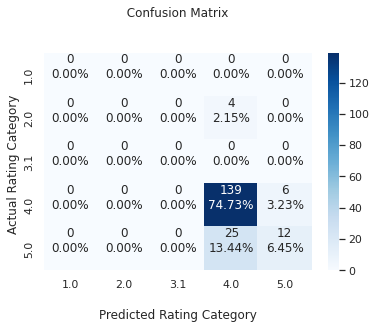

In [489]:
plot_confusion_matrix(y_val_SS,linear_y_pred_validation_SS_T1)

In [490]:
linear_y_pred_SS_T1=svc_SS_T1.predict(X_test_K_SS)
linear_y_pred_SS_T1

array([1., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 1., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 5., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5.,
       4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

In [491]:
id=df_test_id['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': linear_y_pred_SS_T1})

pred_df.to_csv('SS_linear_svm_T1.csv', index=False)

test (kaggle) score is 76%

### trial (Gaussian Radial Bassis Function)

---



In [435]:
from sklearn import svm
# SVM regularization parameter
C = 1.0  
# : Gaussian Radial Bassis Function
rbf_svc_SS =   svm.SVC(kernel='rbf', C=C).fit(X_train_SS, y_train_SS)

In [436]:
rbf_svc_SS.score(X_train_SS, y_train_SS)

0.7700228832951945

In [437]:
rbf_y_pred_validation_SS_T1= rbf_svc_SS.predict(X_val_SS)

In [438]:
#Accuracy
from sklearn.metrics import accuracy_score
#measzure the accuracy of the model
rbf_Accuracy=accuracy_score(y_val_SS,rbf_y_pred_validation_SS_T1)
print("rbf_svc_SS_Accuracy    >>>>> " , (rbf_Accuracy))

rbf_svc_SS_Accuracy    >>>>>  0.6940639269406392


In [439]:
print(classification_report(y_val_SS,rbf_y_pred_validation_SS_T1))

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         4
         3.0       0.50      0.03      0.06        31
         4.0       0.69      0.99      0.81       146
         5.0       0.86      0.16      0.27        38

    accuracy                           0.69       219
   macro avg       0.51      0.30      0.29       219
weighted avg       0.68      0.69      0.60       219



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


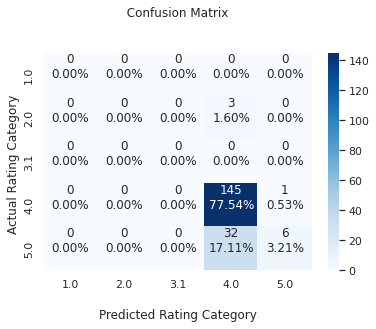

In [440]:
plot_confusion_matrix(y_val_SS,rbf_y_pred_validation_SS_T1)

In [441]:
rbf_y_pred_SS_T1=rbf_svc_SS.predict(X_test_K_SS)
rbf_y_pred_SS_T1

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

In [442]:
id=df_test_id['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': rbf_y_pred_SS_T1})

pred_df.to_csv('SS_rbf_svm_T1.csv', index=False)

test (kaggle) score is 74%

### trial(SVC with 3rd degree poynomial)


In [427]:
from sklearn import svm
# SVM regularization parameter
C = 1.0  
# : SVC with 3rd degree poynomial
poly_svc_SS =  svm.SVC(kernel='poly', degree = 3,  C=C).fit(X_train_SS, y_train_SS)

In [428]:
poly_svc_SS.score(X_train_SS, y_train_SS)

0.7986270022883295

In [429]:
poly_y_pred_validation_SS_T1= poly_svc_SS.predict(X_val_SS)

In [430]:
#Accuracy
from sklearn.metrics import accuracy_score
#measzure the accuracy of the model
poly_Accuracy=accuracy_score(y_val_SS,poly_y_pred_validation_SS_T1)

print("poly_svc_SS_Accuracy   >>>>> " , (poly_Accuracy))

poly_svc_SS_Accuracy   >>>>>  0.6940639269406392


In [431]:
print(classification_report(y_val_SS,poly_y_pred_validation_SS_T1))


              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         4
         3.0       0.67      0.13      0.22        31
         4.0       0.70      0.97      0.81       146
         5.0       0.67      0.16      0.26        38

    accuracy                           0.69       219
   macro avg       0.51      0.31      0.32       219
weighted avg       0.67      0.69      0.62       219



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


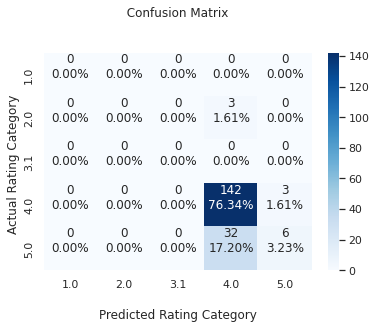

In [432]:
plot_confusion_matrix(y_val_SS,poly_y_pred_validation_SS_T1)

In [433]:
poly_y_pred_SS_T1=poly_svc_SS.predict(X_test_K_SS)
poly_y_pred_SS_T1

array([1., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 4., 3., 4., 3., 4., 4., 4., 4., 4., 4., 4.,
       4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

In [434]:
id=df_test_id['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': poly_y_pred_SS_T1})

pred_df.to_csv('pred_walkthrough2_SS_poly_svc_T1.csv', index=False)

test (kaggle) score is 76%

### trial ( XGB model)

In [443]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [444]:
XGB_SS_T1=XGBClassifier(n_estimators=80,max_depth=10,
).fit(X_train_SS, y_train_SS)

In [445]:
XGB_SS_T1.score(X_train_SS, y_train_SS)

0.9954233409610984

In [446]:
y_pred_validation_XGB_SS_T1 = XGB_SS_T1.predict(X_val_SS)

In [447]:
y_pred_validation_XGB_SS_T1

array([4., 4., 4., 4., 5., 5., 2., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 5., 4.,
       5., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4.,
       4., 5., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4.,
       5., 4., 4., 4., 3., 4., 4., 4., 4., 3., 4., 3., 5., 4., 4., 4., 4.,
       4., 4., 4., 3., 4., 4., 4., 4., 5., 5., 4., 4., 4., 5., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 3., 4., 4., 4., 4., 5., 4., 5., 4., 3., 4., 4., 4., 4., 4., 4.,
       3., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 5., 4., 5., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 5., 3., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 5., 5., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 5., 3., 4., 4., 4., 4., 5., 4., 5., 4.,
       4., 4., 4., 5., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 3.])

In [448]:
#Accuracy
from sklearn.metrics import accuracy_score
 #measzure the accuracy of the model
Accuracy=accuracy_score(y_val_SS,y_pred_validation_XGB_SS_T1)
print("XGB_SS_T1_Accuracy:  " , (Accuracy))

XGB_SS_T1_Accuracy:   0.771689497716895


In [449]:
print(classification_report(y_val_SS,y_pred_validation_XGB_SS_T1))

              precision    recall  f1-score   support

         2.0       1.00      0.25      0.40         4
         3.0       0.69      0.29      0.41        31
         4.0       0.78      0.93      0.85       146
         5.0       0.74      0.61      0.67        38

    accuracy                           0.77       219
   macro avg       0.80      0.52      0.58       219
weighted avg       0.77      0.77      0.75       219



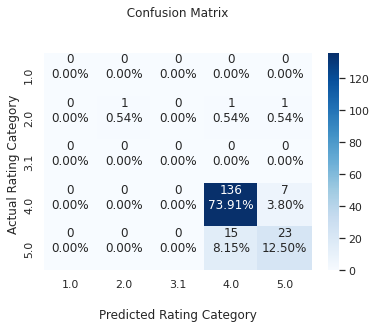

In [450]:
plot_confusion_matrix(y_val_SS, y_pred_validation_XGB_SS_T1)

In [451]:
y_predict_XGB_SS_T1=XGB_SS_T1.predict(X_test_K_SS)
y_predict_XGB_SS_T1

array([5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 5., 4., 4.,
       4., 5., 4., 4., 5., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

In [452]:
id=df_test_id['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': y_predict_XGB_SS_T1})

pred_df.to_csv('XGB_SS_T1.csv', index=False)

test (kaggle) score is 76%

###trial (apply GridSearch with XGB to obtain Parameters that give the best results)

In [453]:
XGB_parameters = [
              {'n_estimators':[20,40,60,80]},
              {'max_depth':[5,15,25]}
              ]


grid_search_XGB_SS = GridSearchCV(estimator = XGBClassifier(),  
                           param_grid = XGB_parameters,
                           scoring = 'accuracy',
                           )


grid_search_XGB_SS.fit(X_train_SS, np.ravel(y_train_SS))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=XGBClassifier(),
             param_grid=[{'n_estimators': [20, 40, 60, 80]},
                         {'max_depth': [5, 15, 25]}],
             scoring='accuracy')

In [454]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search_XGB_SS.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search_XGB_SS.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search_XGB_SS.best_estimator_))

GridSearch CV best score : 0.7895


Parameters that give the best results : 

 {'max_depth': 15}


Estimator that was chosen by the search : 

 XGBClassifier(max_depth=15, objective='multi:softprob')


In [455]:
grid_search_XGB_SS.best_estimator_.fit(X_train_SS, np.ravel(y_train_SS))

XGBClassifier(max_depth=15, objective='multi:softprob')

In [456]:
grid_search_XGB_SS.best_estimator_.score(X_train_SS,y_train_SS)

0.9954233409610984

In [457]:
y_pred_validation_XGB_GS_SS=grid_search_XGB_SS.best_estimator_.predict(X_val_SS)

In [458]:
Accuracy=accuracy_score(y_val_SS,y_pred_validation_XGB_GS_SS)
#measzure the accuracy of the model
print("grid_search_XGB_SS_Accuracy:  " , (Accuracy))

grid_search_XGB_SS_Accuracy:   0.776255707762557


In [459]:
print(classification_report(y_val_SS,y_pred_validation_XGB_GS_SS))

              precision    recall  f1-score   support

         2.0       1.00      0.25      0.40         4
         3.0       0.69      0.29      0.41        31
         4.0       0.78      0.94      0.85       146
         5.0       0.77      0.61      0.68        38

    accuracy                           0.78       219
   macro avg       0.81      0.52      0.58       219
weighted avg       0.77      0.78      0.75       219



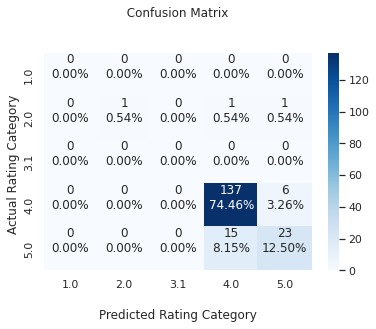

In [460]:
plot_confusion_matrix(y_val_SS, y_pred_validation_XGB_GS_SS)

In [461]:
y_predict_XGB_GS_SS=grid_search_XGB_SS.best_estimator_.predict(X_test_K_SS)
y_predict_XGB_GS_SS

array([5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 3., 4., 4., 4., 4., 4., 3., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 3., 4., 4., 4., 5., 4., 4.,
       4., 5., 4., 4., 5., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

In [462]:
id=df_test_id['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': y_predict_XGB_GS_SS})

pred_df.to_csv('XGB_GS_SS.csv', index=False)

test (kaggle) score is 77%

###trial ( Random Forest model)

In [463]:
from sklearn.ensemble import RandomForestClassifier

In [464]:
RF_SS_T1=RandomForestClassifier().fit(X_train_SS, y_train_SS)

In [465]:
RF_SS_T1.score(X_train_SS, y_train_SS)

0.9954233409610984

In [466]:
y_pred_validation_RF_SS_T1 = RF_SS_T1.predict(X_val_SS)

In [467]:
y_pred_validation_RF_SS_T1

array([4., 4., 4., 4., 5., 5., 2., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4.,
       5., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4.,
       4., 5., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4.,
       5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4.,
       4., 4., 4., 3., 4., 4., 4., 4., 5., 5., 4., 4., 4., 5., 4., 4., 4.,
       4., 4., 5., 4., 4., 4., 5., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 3., 4., 4., 4., 4., 5., 4., 5., 4., 3., 4., 4., 4., 4., 4., 4.,
       5., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 5., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 3., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 5., 5., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 5., 3., 4., 4., 4., 4., 5., 4., 5., 4.,
       4., 4., 4., 5., 4., 3., 4., 5., 4., 4., 5., 4., 4., 4., 4.])

In [468]:
Accuracy=accuracy_score(y_val_SS,y_pred_validation_RF_SS_T1) 
#measzure the accuracy of the model
print("RF_SS_T1_Accuracy:  " , (Accuracy))

RF_SS_T1_Accuracy:   0.7899543378995434


In [469]:
print(classification_report(y_val_SS,y_pred_validation_RF_SS_T1))

              precision    recall  f1-score   support

         2.0       1.00      0.25      0.40         4
         3.0       0.78      0.23      0.35        31
         4.0       0.80      0.97      0.87       146
         5.0       0.75      0.63      0.69        38

    accuracy                           0.79       219
   macro avg       0.83      0.52      0.58       219
weighted avg       0.79      0.79      0.76       219



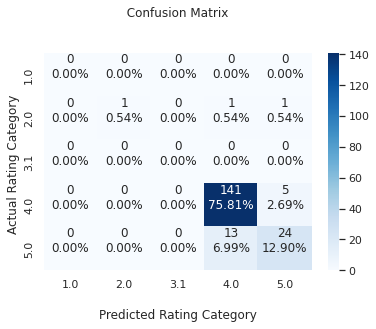

In [470]:
plot_confusion_matrix(y_val_SS, y_pred_validation_RF_SS_T1)

In [471]:
y_predict_RF_SS_T1=RF_SS_T1.predict(X_test_K_SS)
y_predict_RF_SS_T1

array([5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4.,
       4., 5., 4., 4., 4., 3., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3.,
       5., 4., 4., 4., 5., 4., 4., 3., 4., 5., 4., 4., 4., 4., 5., 4., 4.,
       4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 5., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5.,
       4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 5., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4.,
       4., 5., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       5., 4., 4., 4., 4.

In [472]:
id=df_test_id['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': y_predict_RF_SS_T1})

pred_df.to_csv('RF_SS_T1.csv', index=False)

test (kaggle) score is 78%

###trial (apply GridSearch with Random Forest to obtain Parameters that give the best results)
For better results we need to fine tune the parameters

In [473]:
XGB_parameters = [
              {'n_estimators':[20,40,60,80]},
              {'max_features':['auto', 'sqrt', 'log2']}
              ]

grid_search_RF_SS = GridSearchCV(estimator = RandomForestClassifier(),  
                           param_grid = XGB_parameters,
                           scoring = 'accuracy',
                           )


grid_search_RF_SS.fit(X_train_SS, np.ravel(y_train_SS))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'n_estimators': [20, 40, 60, 80]},
                         {'max_features': ['auto', 'sqrt', 'log2']}],
             scoring='accuracy')

In [474]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search_RF_SS.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search_RF_SS.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search_RF_SS.best_estimator_))

GridSearch CV best score : 0.7998


Parameters that give the best results : 

 {'max_features': 'sqrt'}


Estimator that was chosen by the search : 

 RandomForestClassifier(max_features='sqrt')


In [475]:
grid_search_RF_SS.best_estimator_.fit(X_train_SS, np.ravel(y_train_SS))

RandomForestClassifier(max_features='sqrt')

In [476]:
grid_search_RF_SS.best_estimator_.score(X_train_SS,y_train_SS)

0.9954233409610984

In [477]:
y_pred_validation_RF_GS_FS=grid_search_RF_SS.best_estimator_.predict(X_val_SS)

In [478]:
Accuracy=accuracy_score(y_val_SS,y_pred_validation_RF_GS_FS) 
#measzure the accuracy of the model
print("grid_search_RF_FS_Accuracy:  " , (Accuracy))

grid_search_RF_FS_Accuracy:   0.7853881278538812


In [479]:
print(classification_report(y_val_SS,y_pred_validation_RF_GS_FS))

              precision    recall  f1-score   support

         2.0       1.00      0.25      0.40         4
         3.0       0.88      0.23      0.36        31
         4.0       0.79      0.97      0.87       146
         5.0       0.73      0.58      0.65        38

    accuracy                           0.79       219
   macro avg       0.85      0.51      0.57       219
weighted avg       0.80      0.79      0.75       219



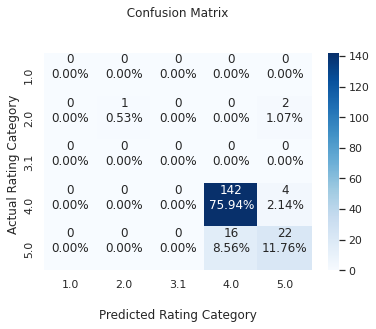

In [480]:
plot_confusion_matrix(y_val_SS, y_pred_validation_RF_GS_FS)

In [481]:
y_predict_RF_GS_SS=grid_search_RF_SS.best_estimator_.predict(X_test_K_SS)
y_predict_RF_GS_SS

array([5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 5., 4., 4., 4., 3., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 4., 4., 4., 5., 4., 4., 4., 4., 5., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 3., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 5., 5., 4., 4., 4., 4., 4., 4., 5., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

In [482]:
id=df_test_id['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': y_predict_RF_GS_SS})

pred_df.to_csv('GS_RF_SS.csv', index=False)

test (kaggle) score is 75%

#Third Solution

predict the product ratings given the other features known for a product on Wish.com based on numerical features and apply preprocessing encoder (one hot encoder) on categorical features (['product_color', 'product_variation_size_id', 'origin_country'])

###prepare data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [ ]:
df_train_TS=df_train

In [ ]:
df_test_TS_K=df_test

In [ ]:
df_train_TS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 1093
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        1093 non-null   float64
 1   retail_price                 1093 non-null   int64  
 2   units_sold                   1093 non-null   int64  
 3   uses_ad_boosts               1093 non-null   int64  
 4   rating                       1093 non-null   float64
 5   rating_count                 1093 non-null   int64  
 6   badges_count                 1093 non-null   int64  
 7   badge_local_product          1093 non-null   int64  
 8   badge_product_quality        1093 non-null   int64  
 9   badge_fast_shipping          1093 non-null   int64  
 10  product_color                1093 non-null   object 
 11  product_variation_size_id    1093 non-null   object 
 12  product_variation_inventory  1093 non-null   int64  
 13  shipping_option_pr

In [ ]:
df_train_TS.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,countries_shipped_to,merchant_rating_count,merchant_rating
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1.093000e+03,1093.000000
mean,8.283568,23.695334,4522.753888,0.432754,4.004575,916.355901,0.113449,0.019213,0.083257,0.010979,32.835316,2.335773,40.483989,2.678107e+04,4.036020
std,3.836460,31.812401,9829.173414,0.495684,0.582857,2038.307907,0.347588,0.137336,0.276397,0.104251,21.444202,1.003552,20.205469,8.620109e+04,0.200409
min,1.000000,2.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.000000,4.000000e+00,2.941176
25%,5.830000,7.000000,100.000000,0.000000,4.000000,24.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,31.000000,1.926000e+03,3.918367
50%,8.000000,10.000000,1000.000000,0.000000,4.000000,144.000000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,40.000000,8.225000e+03,4.045170
75%,11.000000,26.000000,5000.000000,1.000000,4.000000,846.000000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,43.000000,2.276500e+04,4.166509
max,27.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,3.000000,1.000000,1.000000,1.000000,50.000000,7.000000,140.000000,2.174765e+06,4.577519


In [ ]:
df_train_TS_num=df_train_TS._get_numeric_data()

In [ ]:
df_train_TS_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 1093
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        1093 non-null   float64
 1   retail_price                 1093 non-null   int64  
 2   units_sold                   1093 non-null   int64  
 3   uses_ad_boosts               1093 non-null   int64  
 4   rating                       1093 non-null   float64
 5   rating_count                 1093 non-null   int64  
 6   badges_count                 1093 non-null   int64  
 7   badge_local_product          1093 non-null   int64  
 8   badge_product_quality        1093 non-null   int64  
 9   badge_fast_shipping          1093 non-null   int64  
 10  product_variation_inventory  1093 non-null   int64  
 11  shipping_option_price        1093 non-null   int64  
 12  countries_shipped_to         1093 non-null   int64  
 13  merchant_rating_co

In [ ]:
# categorical features 
df_train_TS_cat = df_train_TS.select_dtypes(include=['category','object'])
df_test_TS_cat = df_test_TS_K.select_dtypes(include=['category','object'])

In [ ]:
df_train_TS_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 1093
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   product_color              1093 non-null   object
 1   product_variation_size_id  1093 non-null   object
 2   origin_country             1093 non-null   object
 3   tags_simple                1093 non-null   object
 4   product_category           1093 non-null   object
dtypes: object(5)
memory usage: 51.2+ KB


In [ ]:
df_train_TS_cat.columns

Index(['product_color', 'product_variation_size_id', 'origin_country',
       'tags_simple', 'product_category'],
      dtype='object')

In [ ]:
df_train_TS=df_train_TS.drop(['tags_simple', 'product_category'], axis=1)

In [ ]:
df_test_TS_K=df_test_TS_K.drop(['tags_simple', 'product_category'], axis=1)

In [ ]:
print("len of training data[product_color] >>>>>",len(df_train_TS_cat['product_color'].unique()))
print("len of test data[product_color]     >>>>>",len(df_test_TS_cat['product_color'].unique()))
print("len of training data[product_variation_size_id] >>>>>",len(df_train_TS_cat['product_variation_size_id'].unique()))
print("len of test data[product_variation_size_id]     >>>>>",len(df_test_TS_cat['product_variation_size_id'].unique()))
print("len of training data[origin_country] >>>>>",len(df_train_TS_cat['origin_country'].unique()))
print("len of test data[origin_country]     >>>>>",len(df_test_TS_cat['origin_country'].unique()))

len of training data[product_color] >>>>> 14
len of test data[product_color]     >>>>> 14
len of training data[product_variation_size_id] >>>>> 11
len of test data[product_variation_size_id]     >>>>> 11
len of training data[origin_country] >>>>> 3
len of test data[origin_country]     >>>>> 3


In [ ]:
features = ['product_color', 'product_variation_size_id', 'origin_country',
           ]

In [ ]:
for col in range(len(features)):
    count = df_train_TS[features[col]].unique() # printing unique values of each column
    print("number of unique values in %s ="%features[col],len(count))

number of unique values in product_color = 14
number of unique values in product_variation_size_id = 11
number of unique values in origin_country = 3


In [ ]:
dummy_Dataframe = pd.DataFrame()

for column in range(len(features)):
    dummy_Df = pd.get_dummies(df_train_TS[features[column]],prefix=features[column])
    dummy_Dataframe = pd.concat([dummy_Dataframe,dummy_Df],axis=1)

In [ ]:
data_train_new_TS = df_train_TS.drop(columns=features)
data_train_new_TS=pd.concat([dummy_Dataframe,data_train_new_TS], axis=1 )
data_train_new_TS

,product_color_beige,product_color_black,product_color_blue,product_color_brown,product_color_gray,product_color_green,product_color_multicolor,product_color_orange,product_color_other,product_color_pink,...,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,countries_shipped_to,merchant_rating_count,merchant_rating
0,0,0,0,0,0,0,0,0,0,0,...,1670,0,0,0,0,50,3,30,66644,4.137582
1,0,1,0,0,0,0,0,0,0,0,...,843,1,1,0,0,50,3,37,25752,4.256873
2,0,0,0,0,0,0,0,0,0,0,...,10,0,0,0,0,50,2,41,3897,3.928920
3,0,0,1,0,0,0,0,0,0,0,...,82,0,0,0,0,5,1,25,7497,4.079365
4,0,0,0,0,0,0,0,1,0,0,...,127,0,0,0,0,50,3,15,173,4.306358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,0,0,0,0,0,0,0,0,0,0,...,2150,0,0,0,0,50,1,41,230951,4.311066
1090,0,0,0,0,0,0,0,0,1,0,...,377,1,0,1,0,31,2,35,2904,4.422521
1091,0,0,0,0,0,0,0,0,0,0,...,135,0,0,0,0,50,3,25,6632,3.748794
1092,0,1,0,0,0,0,0,0,0,0,...,1479,0,0,0,0,50,2,45,5816,3.936382


In [ ]:
data_train_new_TS_x = data_train_new_TS.loc[:, data_train_new_TS.columns !='rating']
data_train_new_TS_y=data_train_new_TS['rating']

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
data_train_new_TS_x = preprocessing.scale(data_train_new_TS_x)


In [ ]:
data_train_new_TS_x.shape

(1093, 42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_TS, X_val_TS, y_train_TS, y_val_TS = train_test_split(data_train_new_TS_x, data_train_new_TS_y, test_size=0.2, random_state=42,shuffle=True)

In [ ]:
print("X_train_TS.shape >>>>> ",X_train_TS.shape)
print("y_train_TS.shape >>>>> ",y_train_TS.shape)
print("X_val_TS.shape >>>>> ",X_val_TS.shape)
print("y_val_TS.shape >>>>> ",y_val_TS.shape)


X_train_TS.shape >>>>>  (874, 42)
y_train_TS.shape >>>>>  (874,)
X_val_TS.shape >>>>>  (219, 42)
y_val_TS.shape >>>>>  (219,)


In [ ]:
df_test_TS_K.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        479 non-null    float64
 1   retail_price                 479 non-null    int64  
 2   units_sold                   479 non-null    int64  
 3   uses_ad_boosts               479 non-null    int64  
 4   rating_count                 479 non-null    int64  
 5   badges_count                 479 non-null    int64  
 6   badge_local_product          479 non-null    int64  
 7   badge_product_quality        479 non-null    int64  
 8   badge_fast_shipping          479 non-null    int64  
 9   product_color                479 non-null    object 
 10  product_variation_size_id    479 non-null    object 
 11  product_variation_inventory  479 non-null    int64  
 12  shipping_option_price        479 non-null    int64  
 13  countries_shipped_to

In [ ]:
features = ['product_color', 'product_variation_size_id', 'origin_country',
           ]

In [ ]:
for col in range(len(features)):
    count = df_test_TS_K[features[col]].unique() # printing unique values of each column
    print("number of unique values in %s ="%features[col],len(count))

number of unique values in product_color = 14
number of unique values in product_variation_size_id = 11
number of unique values in origin_country = 3


In [ ]:
dummy_Dataframe = pd.DataFrame()

for column in range(len(features)):
    dummy_Df = pd.get_dummies(df_test_TS_K[features[column]],prefix=features[column])
    dummy_Dataframe = pd.concat([dummy_Dataframe,dummy_Df],axis=1)

In [ ]:
df_test_K_new_TS = df_test_TS_K.drop(columns=features)
df_test_K_new_TS=pd.concat([dummy_Dataframe,df_test_K_new_TS], axis=1 )
df_test_K_new_TS

,product_color_beige,product_color_black,product_color_blue,product_color_brown,product_color_gray,product_color_green,product_color_multicolor,product_color_orange,product_color_other,product_color_pink,...,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,countries_shipped_to,merchant_rating_count,merchant_rating
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,2,139,3,2.333333
1,0,1,0,0,0,0,0,0,0,0,...,579,0,0,0,0,50,2,31,4213,4.058391
2,0,0,1,0,0,0,0,0,0,0,...,62,0,0,0,0,20,2,41,10501,4.029235
3,0,0,1,0,0,0,0,0,0,0,...,1903,0,0,0,0,50,5,42,15855,4.052917
4,0,0,0,0,0,0,0,0,0,0,...,1799,0,0,0,0,50,3,38,151914,4.127921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,0,1,0,0,0,0,0,0,0,0,...,27,0,0,0,0,50,4,35,572,3.367133
475,0,0,1,0,0,0,0,0,0,0,...,817,0,0,0,0,1,2,41,50864,4.079644
476,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,3,1,39,57,3.824561
477,0,1,0,0,0,0,0,0,0,0,...,8,0,0,0,0,3,1,26,1086,4.056169


In [ ]:
X_test_TS_K=df_test_K_new_TS

In [ ]:
X_test_TS_K = preprocessing.scale(X_test_TS_K)

In [ ]:
print("X_test_TS_K.shape >>>>> ",X_test_TS_K.shape)

X_test_TS_K.shape >>>>>  (479, 42)


###imp

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,roc_curve
from sklearn.metrics import precision_score,precision_recall_curve,recall_score,f1_score,accuracy_score

In [ ]:
def plot_confusion_matrix(y_test, y_pred):
  #Get the confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred,labels=[1.0,2.0,3.1,4.0,5.0])
 
  #print(cf_matrix)
     
  group_counts = ["{0:0.0f}".format(value) for value in
      cf_matrix.flatten()]

  group_percentages = ["{0:.2%}".format(value) for value in
            cf_matrix.flatten()/np.sum(cf_matrix)]

  labels = [f"{v1}\n{v2}\n" for v1, v2 in
  zip(group_counts,group_percentages)]

  labels = np.asarray(labels).reshape(5,5)

  ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

  ax.set_title('  Confusion Matrix  \n\n');
  ax.set_xlabel('\nPredicted Rating Category')
  ax.set_ylabel('Actual Rating Category ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels([1.0,2.0,3.1,4.0,5.0])
  ax.yaxis.set_ticklabels([1.0,2.0,3.1,4.0,5.0])

  ## Display the visualization of the Confusion Matrix.
  plt.show()

In [ ]:
#visualization for roc_curve
from sklearn.metrics import roc_curve , roc_auc_score
def plot_roc_curve(y_test, y_pred):
  #calculate and virtualize the roc curve for the test set
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)
  plt.plot(fpr, tpr, 'r', label = 'AUC = %0.4f' % roc_auc)
  plt.plot(fpr, tpr, color='red', label='')
  plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.legend(loc = 'lower right')
  plt.grid()

##trails

####trial ( Decision tree model)




In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
Dtree_TS_T1 = DecisionTreeClassifier(criterion='gini', max_depth=4) 
Dtree_TS_T1.fit(X_train_TS, y_train_TS)

DecisionTreeClassifier(max_depth=4)

In [ ]:
Dtree_TS_T1.score(X_train_TS, y_train_TS)

0.8077803203661327

In [ ]:
y_pred_validation_TS_T1 = Dtree_TS_T1.predict(X_val_TS)

In [ ]:
y_pred_validation_TS_T1

array([4., 4., 4., 4., 5., 5., 2., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       5., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4.,
       4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4.,
       4., 4., 4., 3., 4., 4., 4., 4., 5., 5., 4., 4., 4., 5., 4., 4., 4.,
       4., 4., 5., 4., 4., 4., 5., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4.,
       5., 4., 4., 4., 4., 2., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 5., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 5., 5., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 5., 4., 5., 4.,
       4., 4., 4., 5., 4., 4., 4., 5., 4., 4., 3., 4., 4., 4., 4.])

In [ ]:
 #measzure the accuracy of the model
Accuracy=accuracy_score(y_val_TS,y_pred_validation_TS_T1)
print("Dtree_TS_T1_Accuracy:  " , (Accuracy))

Dtree_TS_T1_Accuracy:   0.771689497716895


In [ ]:
print(classification_report(y_val_TS,y_pred_validation_TS_T1))

              precision    recall  f1-score   support

         2.0       0.50      0.25      0.33         4
         3.0       1.00      0.10      0.18        31
         4.0       0.77      0.97      0.86       146
         5.0       0.79      0.61      0.69        38

    accuracy                           0.77       219
   macro avg       0.77      0.48      0.51       219
weighted avg       0.80      0.77      0.72       219



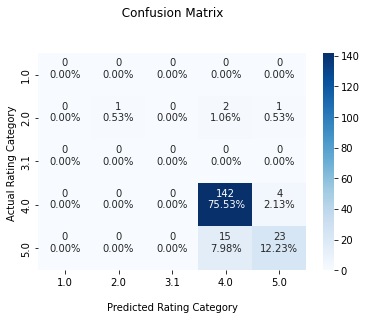

In [ ]:
plot_confusion_matrix(y_val_TS, y_pred_validation_TS_T1)

In [ ]:
y_predict_TS_T1=Dtree_TS_T1.predict(X_test_TS_K)
y_predict_TS_T1

array([3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

In [ ]:
id=df_test_id['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': y_predict_TS_T1})

pred_df.to_csv('TS_DT_T1.csv', index=False)

test (kaggle) score is 76%

####trial  (apply GridSearch with DecionTree  to obtain Parameters that give the best results)

In [ ]:
parameters = [
              {'criterion':['gini', 'entropy']},
              {'max_depth':[2,4,6]}
              ]


grid_search_DT_TS = GridSearchCV(estimator = DecisionTreeClassifier(),  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           )


grid_search_DT_TS.fit(X_train_TS, np.ravel(y_train_TS))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy']},
                         {'max_depth': [2, 4, 6]}],
             scoring='accuracy')

In [ ]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search_DT_TS.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search_DT_TS.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search_DT_TS.best_estimator_))

GridSearch CV best score : 0.7792


Parameters that give the best results : 

 {'max_depth': 4}


Estimator that was chosen by the search : 

 DecisionTreeClassifier(max_depth=4)


In [ ]:
grid_search_DT_TS.best_estimator_.fit(X_train_TS, np.ravel(y_train_TS))

DecisionTreeClassifier(max_depth=4)

In [ ]:
grid_search_DT_TS.best_estimator_.score(X_train_TS, np.ravel(y_train_TS))

0.8077803203661327

In [ ]:
y_pred_validation_TS_T1=grid_search_DT_TS.best_estimator_.predict(X_val_TS)

In [ ]:
Accuracy=accuracy_score(y_val_TS,y_pred_validation_TS_T1) #measzure the accuracy of the model
print("DecisionTree_gs_Accuracy:  " , (Accuracy))

DecisionTree_gs_Accuracy:   0.771689497716895


In [ ]:
print(classification_report(y_val_TS,y_pred_validation_TS_T1))

              precision    recall  f1-score   support

         2.0       0.50      0.25      0.33         4
         3.0       1.00      0.10      0.18        31
         4.0       0.77      0.97      0.86       146
         5.0       0.79      0.61      0.69        38

    accuracy                           0.77       219
   macro avg       0.77      0.48      0.51       219
weighted avg       0.80      0.77      0.72       219



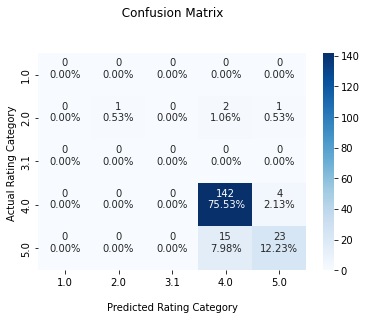

In [ ]:
plot_confusion_matrix(y_val_TS, y_pred_validation_TS_T1)

In [ ]:
y_predict_TS_T2=grid_search_DT_TS.best_estimator_.predict(X_test_TS_K)
y_predict_TS_T2

array([3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

In [ ]:
id=df_test_id['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': y_predict_TS_T2})

pred_df.to_csv('TS_DT_T2.csv', index=False)

test (kaggle) score is 76%

####trial ( Naive Bayes model)


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive_bayes_model_TS_T1 = GaussianNB(var_smoothing=0.43287612810830584)
naive_bayes_model_TS_T1.fit(X_train_TS, y_train_TS)

GaussianNB(var_smoothing=0.43287612810830584)

In [ ]:
naive_bayes_model_TS_T1.score(X_train_TS, y_train_TS)

0.34096109839816935

In [ ]:
y_pred_validation_TS_NB_T1  =  naive_bayes_model_TS_T1.predict(X_val_TS)

In [ ]:
#measzure the accuracy of the model
Accuracy=accuracy_score(y_val_TS,y_pred_validation_TS_NB_T1) 
print("naive_bayes_model_TS_T1_Accuracy:  " , (Accuracy))

naive_bayes_model_TS_T1_Accuracy:   0.365296803652968


In [ ]:
print(classification_report(y_val_TS,y_pred_validation_TS_NB_T1))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.03      0.50      0.06         4
         3.0       0.15      0.26      0.19        31
         4.0       0.85      0.38      0.53       146
         5.0       0.52      0.37      0.43        38

    accuracy                           0.37       219
   macro avg       0.31      0.30      0.24       219
weighted avg       0.68      0.37      0.45       219



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


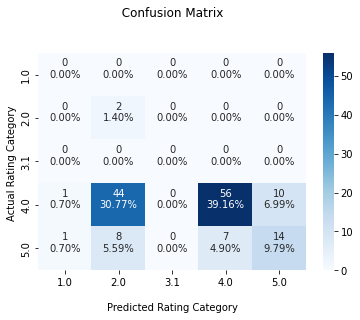

In [ ]:
plot_confusion_matrix(y_val_TS, y_pred_validation_TS_NB_T1)

In [ ]:
y_predict_TS_NB_T1=naive_bayes_model_TS_T1.predict(X_test_TS_K)
y_predict_TS_NB_T1

array([3., 2., 1., 4., 4., 2., 2., 2., 4., 4., 4., 4., 3., 4., 5., 5., 5.,
       4., 2., 4., 5., 4., 2., 1., 4., 2., 4., 5., 4., 4., 4., 2., 2., 4.,
       4., 2., 2., 4., 2., 2., 5., 3., 1., 3., 3., 4., 4., 2., 2., 3., 5.,
       2., 2., 4., 3., 2., 4., 2., 4., 4., 5., 4., 2., 4., 2., 3., 3., 3.,
       4., 3., 2., 4., 3., 4., 3., 4., 4., 4., 2., 4., 3., 5., 4., 4., 2.,
       2., 4., 4., 2., 5., 4., 4., 2., 5., 5., 5., 3., 3., 4., 3., 2., 4.,
       4., 4., 2., 2., 2., 4., 2., 4., 2., 3., 4., 5., 4., 5., 5., 3., 4.,
       2., 5., 4., 3., 2., 4., 3., 4., 4., 2., 2., 2., 4., 3., 4., 2., 5.,
       2., 2., 5., 2., 4., 2., 4., 5., 5., 4., 2., 4., 4., 2., 2., 2., 4.,
       4., 2., 2., 4., 2., 3., 4., 3., 5., 3., 5., 2., 2., 4., 3., 5., 5.,
       4., 2., 5., 3., 3., 5., 4., 2., 3., 4., 5., 4., 4., 3., 4., 2., 4.,
       5., 4., 2., 3., 2., 3., 3., 4., 5., 2., 2., 3., 4., 4., 5., 2., 3.,
       2., 3., 2., 2., 2., 2., 4., 2., 4., 2., 5., 2., 3., 2., 4., 3., 4.,
       2., 2., 2., 3., 4.

In [ ]:
id=df_test_id['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': y_predict_TS_NB_T1})

pred_df.to_csv('TS__NB_T1.csv', index=False)

####trial (apply GridSearch with naive_bayes to obtain Parameters that give the best results)

In [ ]:
NB_parameters = [{'var_smoothing': np.logspace(0,-9, num=100)}
                ]


grid_search_NB_TS = GridSearchCV(estimator =GaussianNB(),  
                           param_grid = NB_parameters,
                           scoring = 'accuracy',
                           )


grid_search_NB_TS.fit(X_train_TS, np.ravel(y_train_TS))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=GaussianNB(),
             param_grid=[{'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.310129...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])}],
             scoring='accuracy')

In [ ]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search_NB_TS.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search_NB_TS.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search_NB_TS.best_estimator_))

GridSearch CV best score : 0.5241


Parameters that give the best results : 

 {'var_smoothing': 1.0}


Estimator that was chosen by the search : 

 GaussianNB(var_smoothing=1.0)


In [ ]:
grid_search_NB_TS.best_estimator_.fit(X_train_TS, np.ravel(y_train_TS))

GaussianNB(var_smoothing=1.0)

In [ ]:
grid_search_NB_TS.best_estimator_.score(X_train_TS,y_train_TS)

0.5160183066361556

In [ ]:
y_pred_validation_TS_NB_T2  =  grid_search_NB_TS.best_estimator_.predict(X_val_TS)

In [ ]:
#measzure the accuracy of the model
Accuracy=accuracy_score(y_val_TS,y_pred_validation_TS_NB_T2) 
print("Accuracy:  " , (Accuracy))

Accuracy:   0.5251141552511416


In [ ]:
print(classification_report(y_val_TS,y_pred_validation_TS_NB_T2))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.03      0.25      0.05         4
         3.0       0.24      0.26      0.25        31
         4.0       0.76      0.65      0.70       146
         5.0       0.61      0.29      0.39        38

    accuracy                           0.53       219
   macro avg       0.33      0.29      0.28       219
weighted avg       0.65      0.53      0.57       219



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


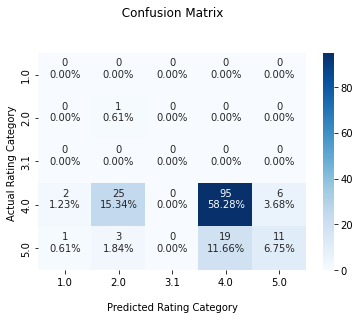

In [ ]:
plot_confusion_matrix(y_val_TS, y_pred_validation_TS_NB_T2)

In [ ]:
y_predict_TS_NB_T2=grid_search_NB_TS.best_estimator_.predict(X_test_TS_K)
y_predict_TS_NB_T2

array([3., 4., 1., 4., 4., 2., 3., 2., 4., 4., 4., 4., 3., 4., 4., 4., 5.,
       4., 3., 4., 4., 4., 2., 1., 4., 2., 4., 5., 4., 4., 4., 2., 4., 4.,
       4., 4., 4., 4., 3., 2., 5., 3., 1., 4., 4., 4., 4., 2., 2., 3., 4.,
       2., 4., 4., 3., 4., 4., 2., 4., 4., 4., 4., 2., 4., 2., 3., 4., 1.,
       4., 4., 2., 4., 3., 4., 3., 4., 4., 4., 2., 4., 3., 4., 4., 4., 2.,
       2., 4., 4., 4., 5., 2., 4., 2., 4., 5., 5., 3., 4., 4., 4., 4., 4.,
       4., 4., 2., 2., 2., 4., 3., 4., 3., 4., 4., 2., 4., 4., 4., 4., 4.,
       4., 5., 4., 4., 4., 4., 3., 4., 4., 4., 4., 1., 4., 1., 4., 4., 5.,
       4., 4., 1., 2., 4., 2., 4., 4., 5., 4., 4., 4., 4., 2., 2., 2., 4.,
       4., 2., 4., 4., 4., 3., 4., 4., 5., 4., 5., 4., 4., 4., 3., 5., 5.,
       4., 4., 5., 3., 4., 5., 4., 2., 3., 4., 5., 4., 4., 4., 4., 3., 4.,
       5., 4., 2., 4., 2., 4., 4., 4., 4., 2., 3., 1., 4., 4., 5., 2., 4.,
       4., 3., 2., 2., 2., 4., 4., 2., 4., 3., 5., 4., 3., 2., 4., 4., 4.,
       2., 2., 4., 4., 4.

In [ ]:
id=df_test_id['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': y_predict_TS_NB_T2})

pred_df.to_csv('TS_NB_gs_T2.csv', index=False)

####trial (SVC with a Linear Kernel) 

In [ ]:
from sklearn import svm
from sklearn.svm import LinearSVC
# SVM regularization parameter
C = 1.0  

# : SVC with a Linear Kernel  
svc_TS_T1 = svm.SVC(kernel='linear', C=C).fit(X_train_TS, y_train_TS)

In [ ]:
svc_TS_T1.score(X_train_TS, y_train_TS)

In [ ]:
linear_y_pred_validation_TS_T1 = svc_TS_T1.predict(X_val_TS)

In [ ]:
linear_y_pred_validation_TS_T1

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 2., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 2., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 3., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 2., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.])

In [ ]:
#measzure the accuracy of the model
linear_Accuracy=accuracy_score(y_val_TS,linear_y_pred_validation_TS_T1)

print("linear_TS_T1_Accuracy >>>>> " , (linear_Accuracy))

linear_TS_T1_Accuracy >>>>>  0.6621004566210046


In [ ]:
print(classification_report(y_val_TS,linear_y_pred_validation_TS_T1))

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         4
         3.0       1.00      0.06      0.12        31
         4.0       0.67      0.98      0.79       146
         5.0       0.00      0.00      0.00        38

    accuracy                           0.66       219
   macro avg       0.42      0.26      0.23       219
weighted avg       0.59      0.66      0.55       219



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[  0   0   0   0   0]
 [  0   0   0   4   0]
 [  0   0   0   0   0]
 [  0   3   0 143   0]
 [  0   0   0  38   0]]


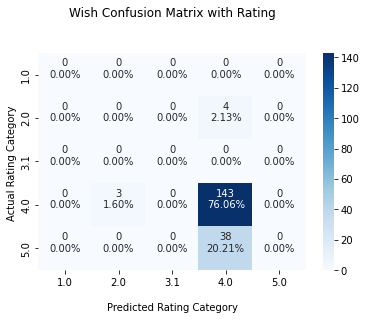

In [ ]:
plot_confusion_matrix(y_val_TS,linear_y_pred_validation_TS_T1)

In [ ]:
linear_y_pred_TS_T1=svc_TS_T1.predict(X_test_TS_K)
linear_y_pred_TS_T1

array([1., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 2., 4., 2., 4., 5., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 2., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

In [ ]:
id=df_test_id['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': linear_y_pred_TS_T1})

pred_df.to_csv('TS_linearsvm_T1.csv', index=False)

test (kaggle) score is 75%

####trial ( Gaussian Radial Bassis Function)

---



In [ ]:
from sklearn import svm
# SVM regularization parameter
C = 1.0  
# : Gaussian Radial Bassis Function
rbf_svc_TS =svm.SVC(kernel='rbf', C=C).fit(X_train_TS, y_train_TS)

In [ ]:
rbf_svc_TS.score(X_train_TS, y_train_TS)

In [ ]:
rbf_y_pred_validation_TS_T1= rbf_svc_TS.predict(X_val_TS)

In [ ]:
#measzure the accuracy of the model
rbf_Accuracy=accuracy_score(y_val_TS,rbf_y_pred_validation_TS_T1)
print("rbf_svc_TS_Accuracy    >>>>> " , (rbf_Accuracy))

In [ ]:
print(classification_report(y_val_TS,rbf_y_pred_validation_TS_T1))

In [ ]:
plot_confusion_matrix(y_val_TS,rbf_y_pred_validation_TS_T1)

In [ ]:
rbf_y_pred_TS_T1=rbf_svc_TS.predict(X_test_TS_K)
rbf_y_pred_TS_T1

In [ ]:
id=df_test_id['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': rbf_y_pred_TS_T1})

pred_df.to_csv('TS_rbfsvm_T1.csv', index=False)

test (kaggle) score is 76%

####trial (SVC with 3rd degree poynomial)


In [ ]:
from sklearn import svm
# SVM regularization parameter
C = 1.0  
# : SVC with 3rd degree poynomial
poly_svc_TS =  svm.SVC(kernel='poly', degree = 3,  C=C).fit(X_train_TS, y_train_TS)

In [ ]:
poly_svc_TS.score(X_train_TS, y_train_TS)

0.7929061784897025

In [ ]:
poly_y_pred_validation_TS_T1= poly_svc_TS.predict(X_val_TS)

In [ ]:
#measzure the accuracy of the model
poly_Accuracy=accuracy_score(y_val_TS,poly_y_pred_validation_TS_T1)
print("poly_svc_TS_Accuracy   >>>>> " , (poly_Accuracy))

poly_svc_TS_Accuracy   >>>>>  0.680365296803653


In [ ]:
print(classification_report(y_val_TS,poly_y_pred_validation_TS_T1))

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         4
         3.0       0.40      0.06      0.11        31
         4.0       0.69      0.97      0.80       146
         5.0       0.71      0.13      0.22        38

    accuracy                           0.68       219
   macro avg       0.45      0.29      0.28       219
weighted avg       0.64      0.68      0.59       219



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


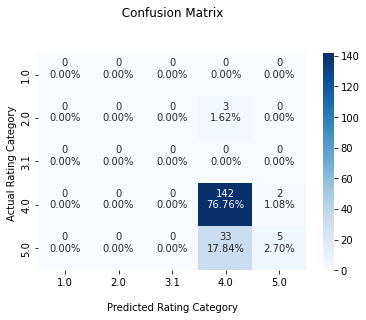

In [ ]:
plot_confusion_matrix(y_val_TS,poly_y_pred_validation_TS_T1)

In [ ]:
poly_y_pred_TS_T1=poly_svc_TS.predict(X_test_TS_K)
poly_y_pred_TS_T1

array([3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

In [ ]:
id=df_test_id['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': poly_y_pred_TS_T1})

pred_df.to_csv('TS_poly_svc_T1.csv', index=False)

test (kaggle) score is 75%

#### trial (XGB)

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [ ]:
XGB_TS_T1=XGBClassifier(n_estimators=80,max_depth=10,
).fit(X_train_TS, y_train_TS)

In [ ]:
XGB_TS_T1.score(X_train_TS, y_train_TS)

0.9954233409610984

In [ ]:
y_pred_validation_XGB_TS_T1 = XGB_TS_T1.predict(X_val_TS)

In [ ]:
y_pred_validation_XGB_TS_T1

array([4., 4., 4., 4., 5., 5., 2., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 5., 4.,
       5., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4.,
       4., 5., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4.,
       5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4.,
       4., 4., 4., 3., 4., 4., 4., 4., 5., 5., 4., 4., 4., 5., 4., 4., 4.,
       4., 4., 5., 4., 4., 4., 5., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 3., 4., 4., 4., 4., 5., 4., 5., 5., 3., 4., 4., 4., 4., 4., 4.,
       3., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 5., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 3., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 5., 5., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 5., 3., 4., 4., 4., 4., 5., 4., 5., 4.,
       4., 4., 4., 5., 4., 3., 4., 5., 4., 4., 5., 4., 4., 4., 3.])

In [ ]:
Accuracy=accuracy_score(y_val_TS,y_pred_validation_XGB_TS_T1) 
#measzure the accuracy of the model
print("XGB_TS_T1_Accuracy:  " , (Accuracy))

XGB_TS_T1_Accuracy:   0.7853881278538812


In [ ]:
print(classification_report(y_val_TS,y_pred_validation_XGB_TS_T1))

              precision    recall  f1-score   support

         2.0       1.00      0.25      0.40         4
         3.0       0.73      0.26      0.38        31
         4.0       0.80      0.95      0.87       146
         5.0       0.73      0.63      0.68        38

    accuracy                           0.79       219
   macro avg       0.81      0.52      0.58       219
weighted avg       0.78      0.79      0.76       219



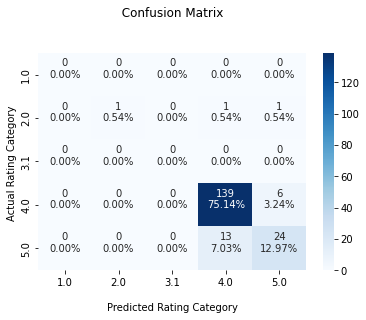

In [ ]:
plot_confusion_matrix(y_val_TS, y_pred_validation_XGB_TS_T1)

In [ ]:
y_predict_XGB_TS_T1=XGB_TS_T1.predict(X_test_TS_K)
y_predict_XGB_TS_T1

array([5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 4., 3., 4., 4., 4., 4., 5., 4., 4., 4., 4.,
       4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4.,
       4., 5., 4., 4., 5., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

In [ ]:
id=df_test_id['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': y_predict_XGB_TS_T1})

pred_df.to_csv('XGB_TS_T1.csv', index=False)

test (kaggle) score is 76%

###trial  (apply GridSearch with XGB to obtain Parameters that give the best results)

In [ ]:
XGB_parameters = [
              {'n_estimators':[20,40,60,80]},
              {'max_depth':[5,15,25]}
              ]


grid_search_XGB_TS = GridSearchCV(estimator = XGBClassifier(),  
                           param_grid = XGB_parameters,
                           scoring = 'accuracy',
                           )


grid_search_XGB_TS.fit(X_train_TS, np.ravel(y_train_TS))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=XGBClassifier(),
             param_grid=[{'n_estimators': [20, 40, 60, 80]},
                         {'max_depth': [5, 15, 25]}],
             scoring='accuracy')

In [ ]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search_XGB_TS.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search_XGB_TS.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search_XGB_TS.best_estimator_))

GridSearch CV best score : 0.7872


Parameters that give the best results : 

 {'max_depth': 5}


Estimator that was chosen by the search : 

 XGBClassifier(max_depth=5, objective='multi:softprob')


In [ ]:
grid_search_XGB_TS.best_estimator_.fit(X_train_TS, np.ravel(y_train_TS))

In [ ]:
grid_search_XGB_TS.best_estimator_.score(X_train_TS,y_train_TS)

In [ ]:
y_pred_validation_XGB_GS_TS=grid_search_XGB_TS.best_estimator_.predict(X_val_TS)

In [ ]:
Accuracy=accuracy_score(y_val_TS,y_pred_validation_XGB_GS_TS)
#measzure the accuracy of the model
print("grid_search_XGB_TS_Accuracy:  " , (Accuracy))

In [ ]:
print(classification_report(y_val_TS,y_pred_validation_XGB_GS_TS))

In [ ]:
plot_confusion_matrix(y_val_TS, y_pred_validation_XGB_GS_TS)

In [ ]:
y_predict_XGB_GS_TS=grid_search_XGB_TS.best_estimator_.predict(X_test_TS_K)
y_predict_XGB_GS_TS

In [ ]:
id=df_test_id['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': y_predict_XGB_GS_TS})

pred_df.to_csv('XGB_GS_TS.csv', index=False)

test (kaggle) score is 77%

###trial (Random Forest model)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF_TS_T1=RandomForestClassifier().fit(X_train_TS, y_train_TS)

In [ ]:
RF_TS_T1.score(X_train_TS, y_train_TS)

0.9954233409610984

In [ ]:
y_pred_validation_RF_TS_T1 = RF_TS_T1.predict(X_val_TS)

In [ ]:
y_pred_validation_RF_TS_T1

array([4., 4., 4., 4., 5., 5., 2., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4.,
       5., 4., 4., 4., 4., 5., 5., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4.,
       4., 5., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4.,
       4., 4., 4., 3., 4., 4., 4., 4., 5., 5., 4., 4., 4., 5., 4., 4., 4.,
       4., 4., 5., 4., 4., 4., 5., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 3., 4., 4., 4., 4., 5., 4., 5., 4., 3., 4., 4., 4., 4., 4., 4.,
       5., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 5., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 3., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 5., 5., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 5., 3., 4., 4., 4., 4., 5., 4., 4., 4.,
       4., 4., 4., 5., 4., 4., 4., 5., 4., 4., 5., 4., 4., 4., 4.])

In [ ]:
Accuracy=accuracy_score(y_val_TS,y_pred_validation_RF_TS_T1)
#measzure the accuracy of the model
print("RF_TS_T1_Accuracy:  " , (Accuracy))


RF_TS_T1_Accuracy:   0.7899543378995434


In [ ]:
print(classification_report(y_val_TS,y_pred_validation_RF_TS_T1))

              precision    recall  f1-score   support

         2.0       1.00      0.25      0.40         4
         3.0       0.88      0.23      0.36        31
         4.0       0.79      0.97      0.87       146
         5.0       0.74      0.61      0.67        38

    accuracy                           0.79       219
   macro avg       0.85      0.51      0.57       219
weighted avg       0.80      0.79      0.76       219



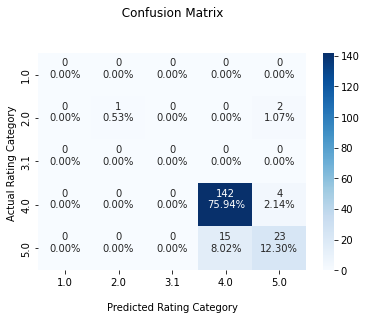

In [ ]:
plot_confusion_matrix(y_val_TS, y_pred_validation_RF_TS_T1)

In [ ]:
y_predict_RF_TS_T1=RF_TS_T1.predict(X_test_TS_K)
y_predict_RF_TS_T1

array([5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4.,
       4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4.,
       5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 4., 3., 4., 5., 5., 4., 4., 5., 5., 4., 4.,
       4., 4., 4., 3., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5.,
       4., 5., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4.,
       4., 5., 4., 4., 4., 4., 4., 4., 5., 4., 4., 3., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 3., 5., 4., 4., 5., 4., 4.,
       4., 4., 4., 4., 5., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

In [ ]:
id=df_test_id['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': y_predict_RF_TS_T1})

pred_df.to_csv('RF_TS_T1.csv', index=False)

test (kaggle) score is 75%

###trial (apply GridSearch with Random Forest to obtain Parameters that give the best results)
For better results we need to fine tune the parameters

In [ ]:
XGB_parameters = [
              {'n_estimators':[20,40,60,80]},
              {'max_features':['auto', 'sqrt', 'log2']}
              ]

grid_search_RF_TS = GridSearchCV(estimator = RandomForestClassifier(),  
                           param_grid = XGB_parameters,
                           scoring = 'accuracy',
                           )


grid_search_RF_TS.fit(X_train_TS, np.ravel(y_train_TS))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'n_estimators': [20, 40, 60, 80]},
                         {'max_features': ['auto', 'sqrt', 'log2']}],
             scoring='accuracy')

In [ ]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search_RF_TS.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search_RF_TS.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search_RF_TS.best_estimator_))

GridSearch CV best score : 0.7952


Parameters that give the best results : 

 {'n_estimators': 20}


Estimator that was chosen by the search : 

 RandomForestClassifier(n_estimators=20)


In [ ]:
grid_search_RF_TS.best_estimator_.fit(X_train_TS, np.ravel(y_train_TS))

RandomForestClassifier(n_estimators=20)

In [ ]:
grid_search_RF_TS.best_estimator_.score(X_train_TS, y_train_TS)

0.9919908466819222

In [ ]:
y_pred_validation_RF_GS_TS=grid_search_RF_TS.best_estimator_.predict(X_val_TS)

In [ ]:
Accuracy=accuracy_score(y_val_TS,y_pred_validation_RF_GS_TS)
#measzure the accuracy of the model
print("grid_search_RF_TS_Accuracy:  " , (Accuracy))

grid_search_RF_TS_Accuracy:   0.7808219178082192


In [ ]:
print(classification_report(y_val_TS,y_pred_validation_RF_GS_TS))

              precision    recall  f1-score   support

         2.0       1.00      0.25      0.40         4
         3.0       0.73      0.26      0.38        31
         4.0       0.79      0.95      0.86       146
         5.0       0.74      0.61      0.67        38

    accuracy                           0.78       219
   macro avg       0.81      0.52      0.58       219
weighted avg       0.78      0.78      0.75       219



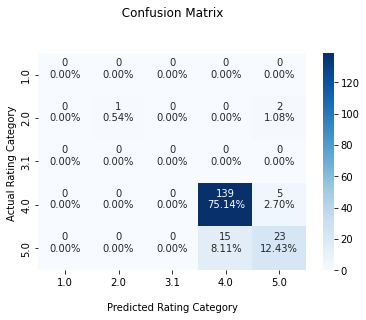

In [ ]:
plot_confusion_matrix(y_val_TS, y_pred_validation_RF_GS_TS)

In [ ]:
y_predict_RF_GS_TS=grid_search_RF_TS.best_estimator_.predict(X_test_TS_K)
y_predict_RF_GS_TS

array([5., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 5., 5., 4., 5.,
       4., 5., 4., 4., 5., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 5., 4.,
       4., 4., 4., 4., 5., 4., 5., 3., 4., 4., 4., 3., 5., 4., 5., 4., 4.,
       4., 4., 3., 4., 3., 4., 3., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 4., 3., 4., 5., 4., 4., 5., 4., 5., 4., 4.,
       4., 4., 4., 3., 5., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 5.,
       4., 5., 4., 4., 4., 4., 5., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 5., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4.,
       4., 4., 4., 3., 4., 4., 4., 4., 5., 4., 5., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4.,
       4., 4., 5., 4., 3., 4., 4., 4., 5., 4., 4., 4., 4., 5., 5., 4., 4.,
       4., 5., 4., 3., 5., 5., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 5.,
       5., 5., 4., 5., 4.

In [ ]:
id=df_test_id['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': y_predict_RF_GS_TS})

pred_df.to_csv('GS_RF_TS.csv', index=False)

test (kaggle) score is 76%